# Ejercicio N° 3 - Trabajo Práctico N° 5

# Librerías Generales

In [1274]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

# RNA
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Visualización de resultados
from sklearn.metrics import confusion_matrix

import warnings

# Desactivar todas las advertencias
warnings.filterwarnings("ignore")

# Importación de datos estructurados (tabulares)

In [1275]:
dataset = pd.read_csv("datos_acv.csv")

In [1276]:
dataset

,id,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
0,9046,hombre,67.0,0,1,1,privado,urbano,228.69,36.6,fumaba,1
1,51676,mujer,61.0,0,0,1,autonomo,rural,202.21,NaN,nunca,1
2,31112,hombre,80.0,0,1,1,privado,rural,105.92,32.5,nunca,1
3,60182,mujer,49.0,0,0,1,privado,urbano,171.23,34.4,fuma,1
4,1665,mujer,79.0,1,0,1,autonomo,rural,174.12,24.0,nunca,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,mujer,80.0,1,0,1,privado,urbano,83.75,NaN,nunca,0
5106,44873,mujer,81.0,0,0,1,autonomo,urbano,125.20,40.0,nunca,0
5107,19723,mujer,35.0,0,0,1,autonomo,rural,82.99,30.6,nunca,0
5108,37544,hombre,51.0,0,0,1,privado,rural,166.29,25.6,fumaba,0


In [1277]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5110 non-null   int64  
 1   genero              5110 non-null   object 
 2   edad                5110 non-null   float64
 3   hipertension        5110 non-null   int64  
 4   enfermedad_corazon  5110 non-null   int64  
 5   casado_alguna_vez   5110 non-null   int64  
 6   tipo_trabajo        5110 non-null   object 
 7   tipo_residencia     5110 non-null   object 
 8   nivel_glucosa       5110 non-null   float64
 9   imc                 4909 non-null   float64
 10  estado_fumador      5110 non-null   object 
 11  apoplejia           5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [1278]:
dataset.describe()

,id,edad,hipertension,enfermedad_corazon,casado_alguna_vez,nivel_glucosa,imc,apoplejia
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,0.475034,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,1.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,1.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [1279]:
dataset['estado_fumador'].replace(r'desconocido', np.nan, inplace = True)

In [1280]:
dataset.isna().sum()

id                       0
genero                   0
edad                     0
hipertension             0
enfermedad_corazon       0
casado_alguna_vez        0
tipo_trabajo             0
tipo_residencia          0
nivel_glucosa            0
imc                    201
estado_fumador        1544
apoplejia                0
dtype: int64

In [1281]:
for col in dataset.columns:
    if dataset[col].dtype == 'object' or (dataset[col].dtype == 'int64' and col != 'id'):
        print(col,"->", dataset[col].unique())

genero -> ['hombre' 'mujer' 'otro']
hipertension -> [0 1]
enfermedad_corazon -> [1 0]
casado_alguna_vez -> [1 0]
tipo_trabajo -> ['privado' 'autonomo' 'gubernamental' 'con_niños' 'nunca_trabajo']
tipo_residencia -> ['urbano' 'rural']
estado_fumador -> ['fumaba' 'nunca' 'fuma' nan]
apoplejia -> [1 0]


In [1282]:
# Podemos ver esto mismo pero en forma porcentual
miss_val = dataset.isnull().sum()/len(dataset)*100
print(miss_val)

id                     0.000000
genero                 0.000000
edad                   0.000000
hipertension           0.000000
enfermedad_corazon     0.000000
casado_alguna_vez      0.000000
tipo_trabajo           0.000000
tipo_residencia        0.000000
nivel_glucosa          0.000000
imc                    3.933464
estado_fumador        30.215264
apoplejia              0.000000
dtype: float64


In [1283]:
print("# Valores perdidos en la variable imc\t\t: {:.2f}%".format(miss_val['imc']))
print("# Valores perdidos en la variable estado_fumador: {:.2f}%".format(miss_val['estado_fumador']))

# Valores perdidos en la variable imc		: 3.93%
# Valores perdidos en la variable estado_fumador: 30.22%


<Axes: >

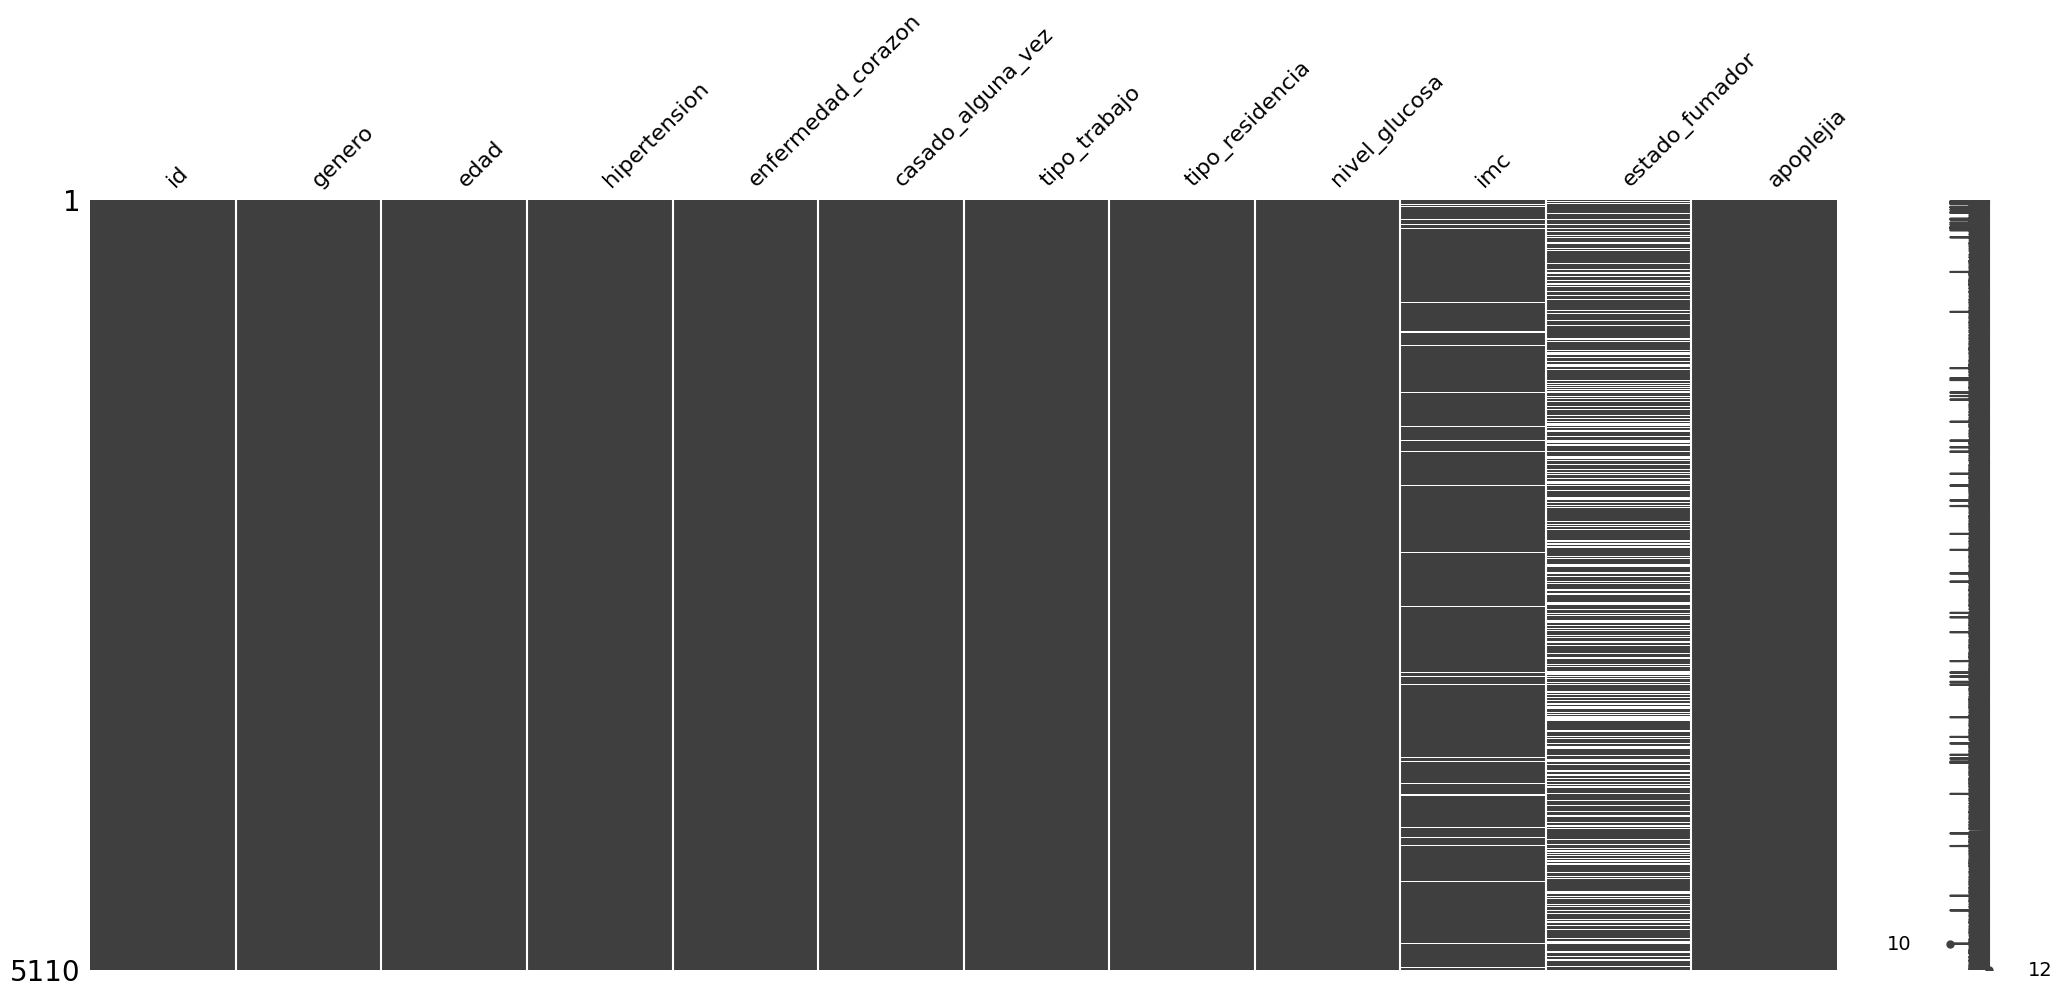

In [1284]:
import missingno

missingno.matrix(dataset)
# Genera la gráfica con los huecos en los datos faltantes. Bastante intuitivo para un análisis visual rápido

Text(0, 0.5, 'casado_alguna_vez')

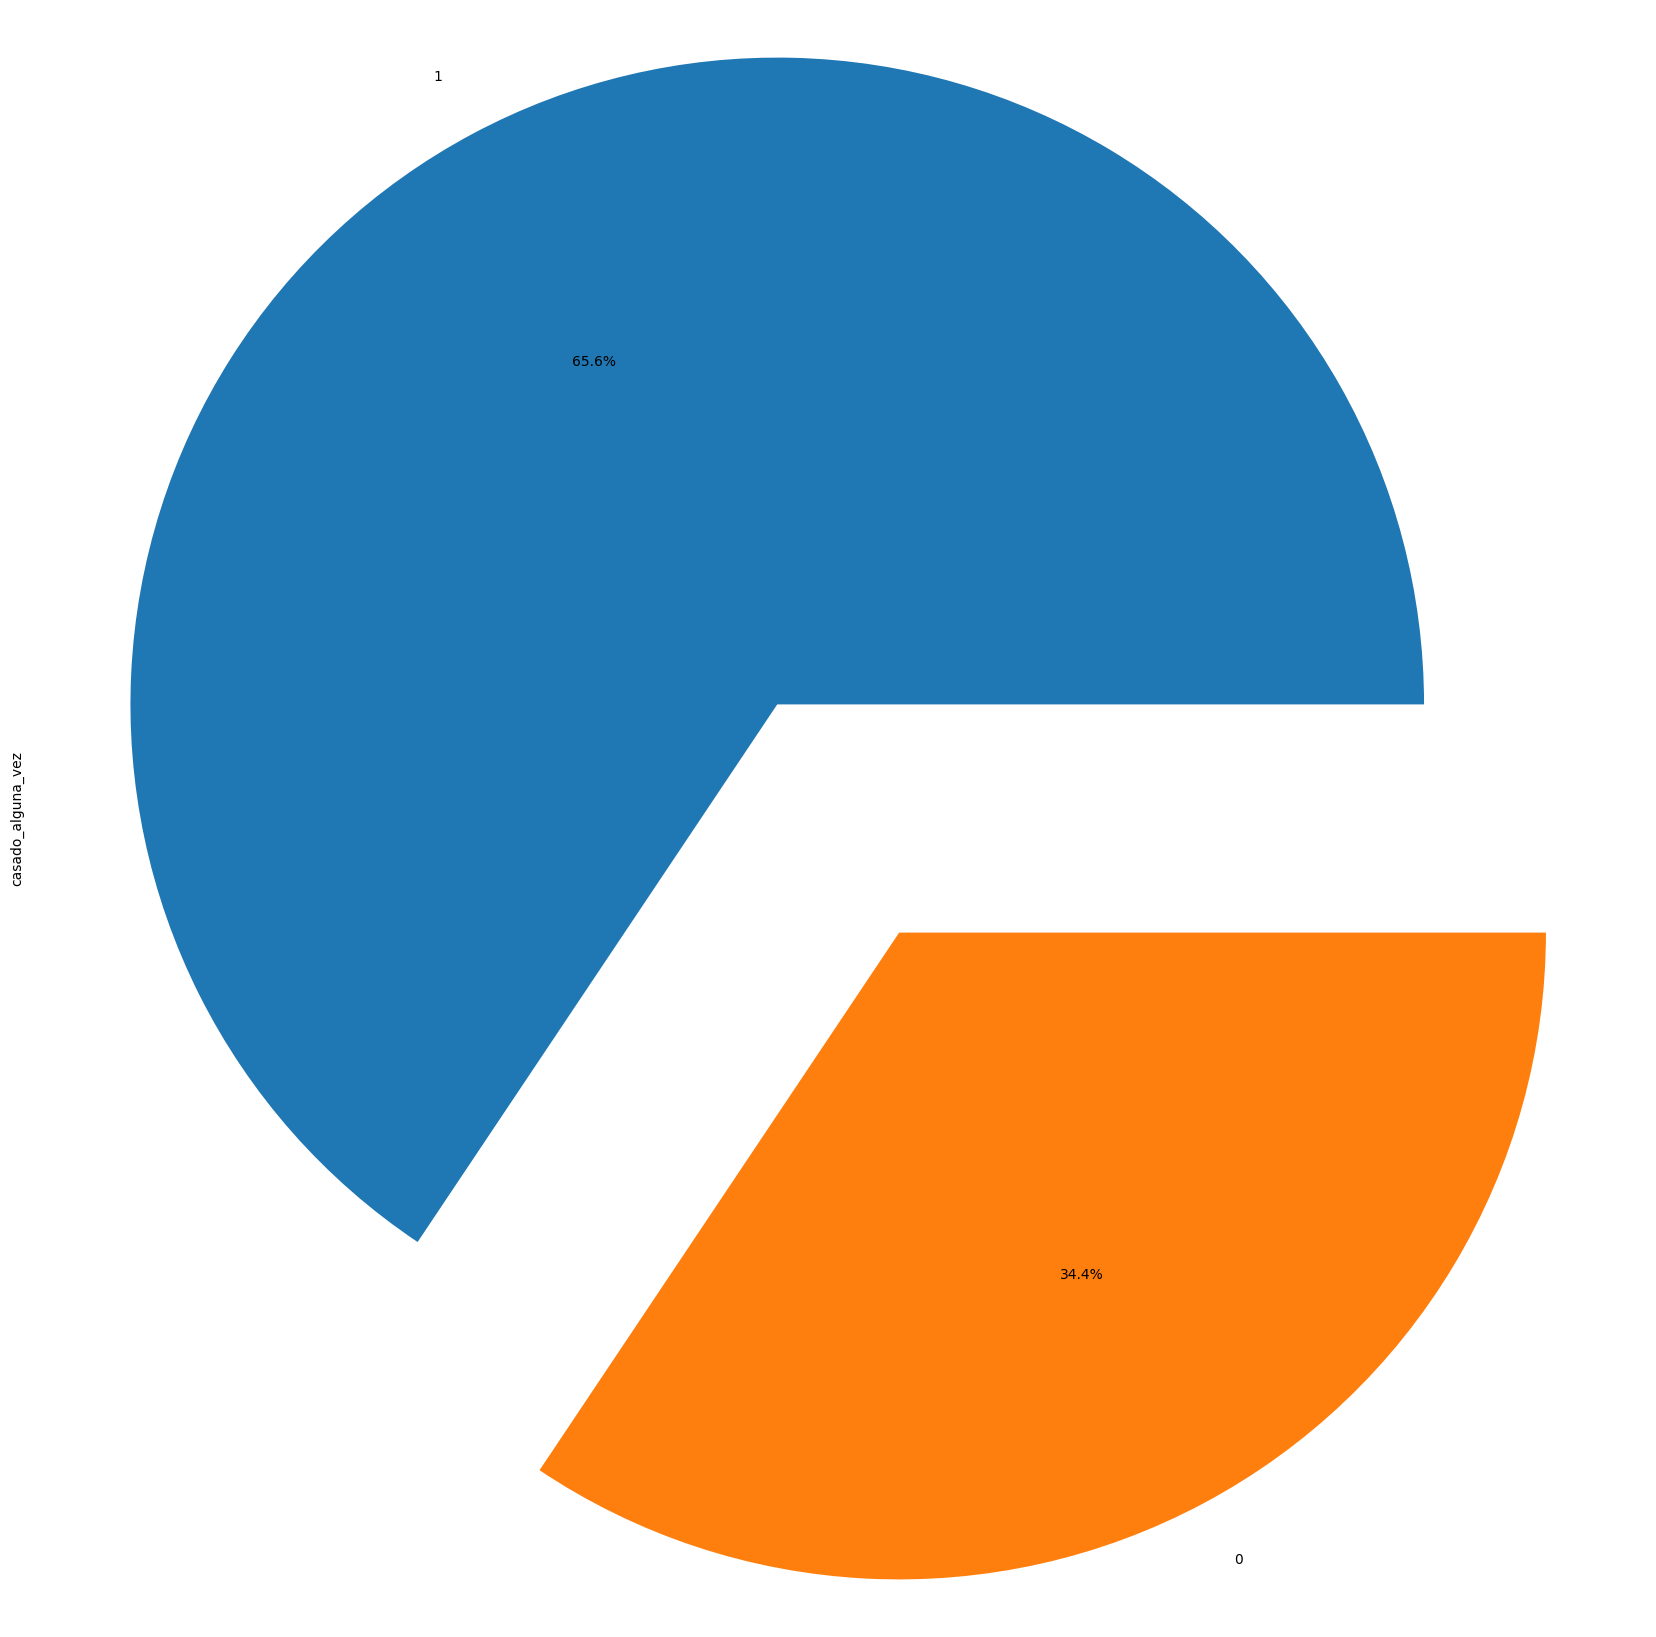

In [1285]:
# Ejemplo de gráfica para una idea de las distribuciones
# En 'explode' cambiar cantidad de elementos segun el descriptor ej: tipo_residencia son 2, tipo_trabajo 5 etc
dataset['casado_alguna_vez'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.2, 0.2]).set_ylabel('casado_alguna_vez')

Text(0, 0.5, 'tipo_trabajo')

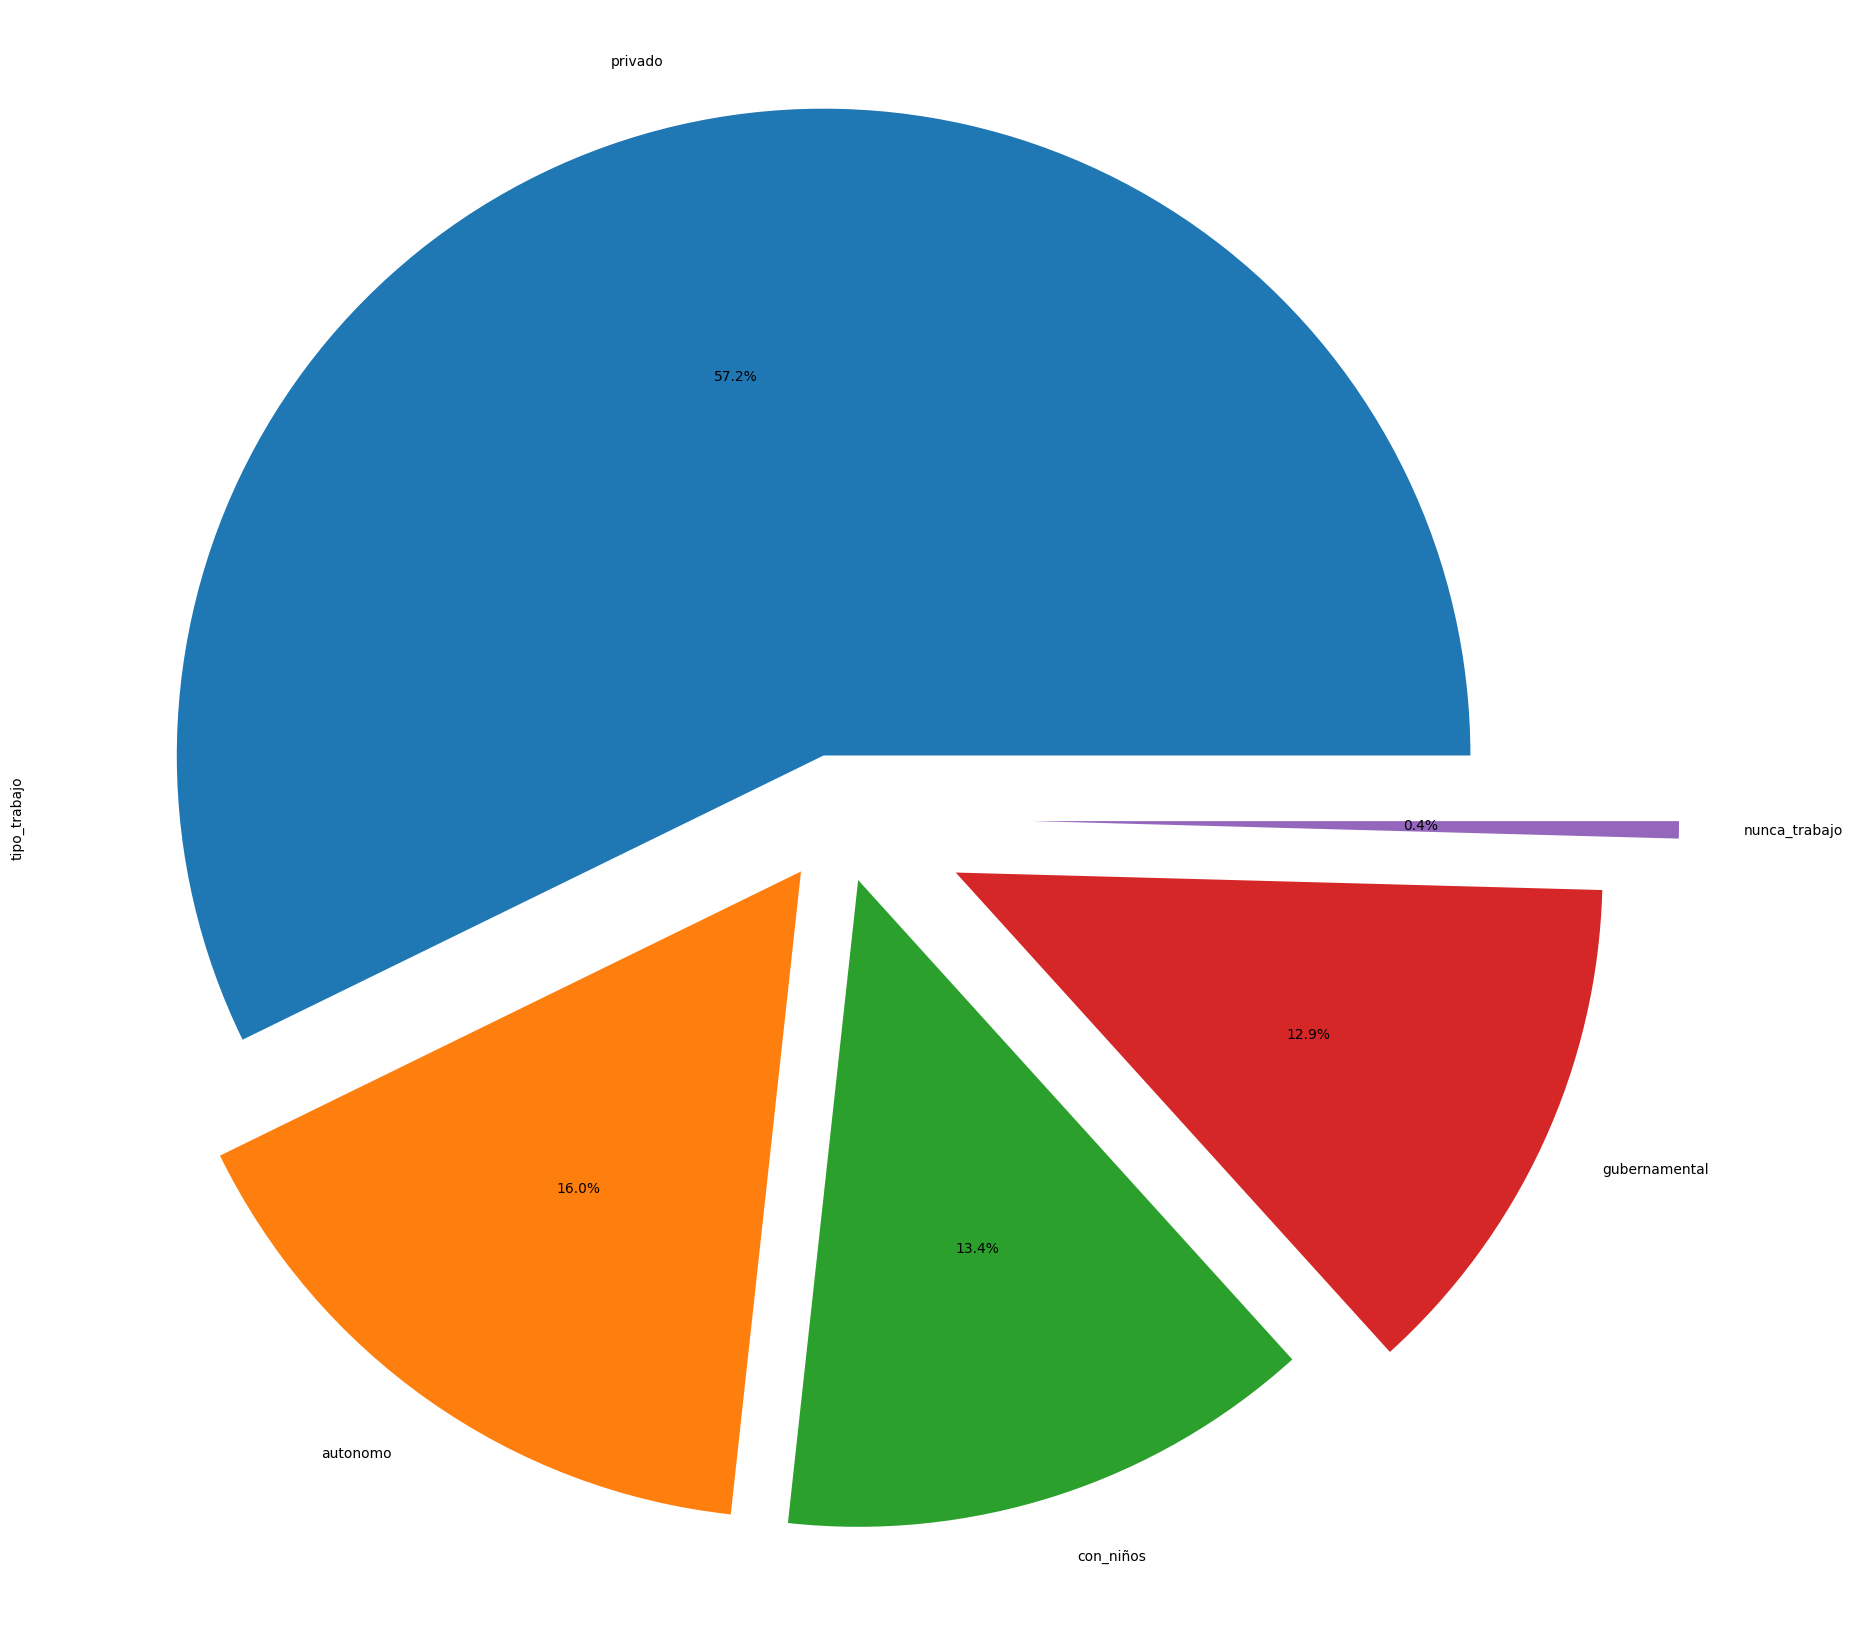

In [1286]:
dataset['tipo_trabajo'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.2, 0.3]).set_ylabel('tipo_trabajo')

Text(0, 0.5, 'genero')

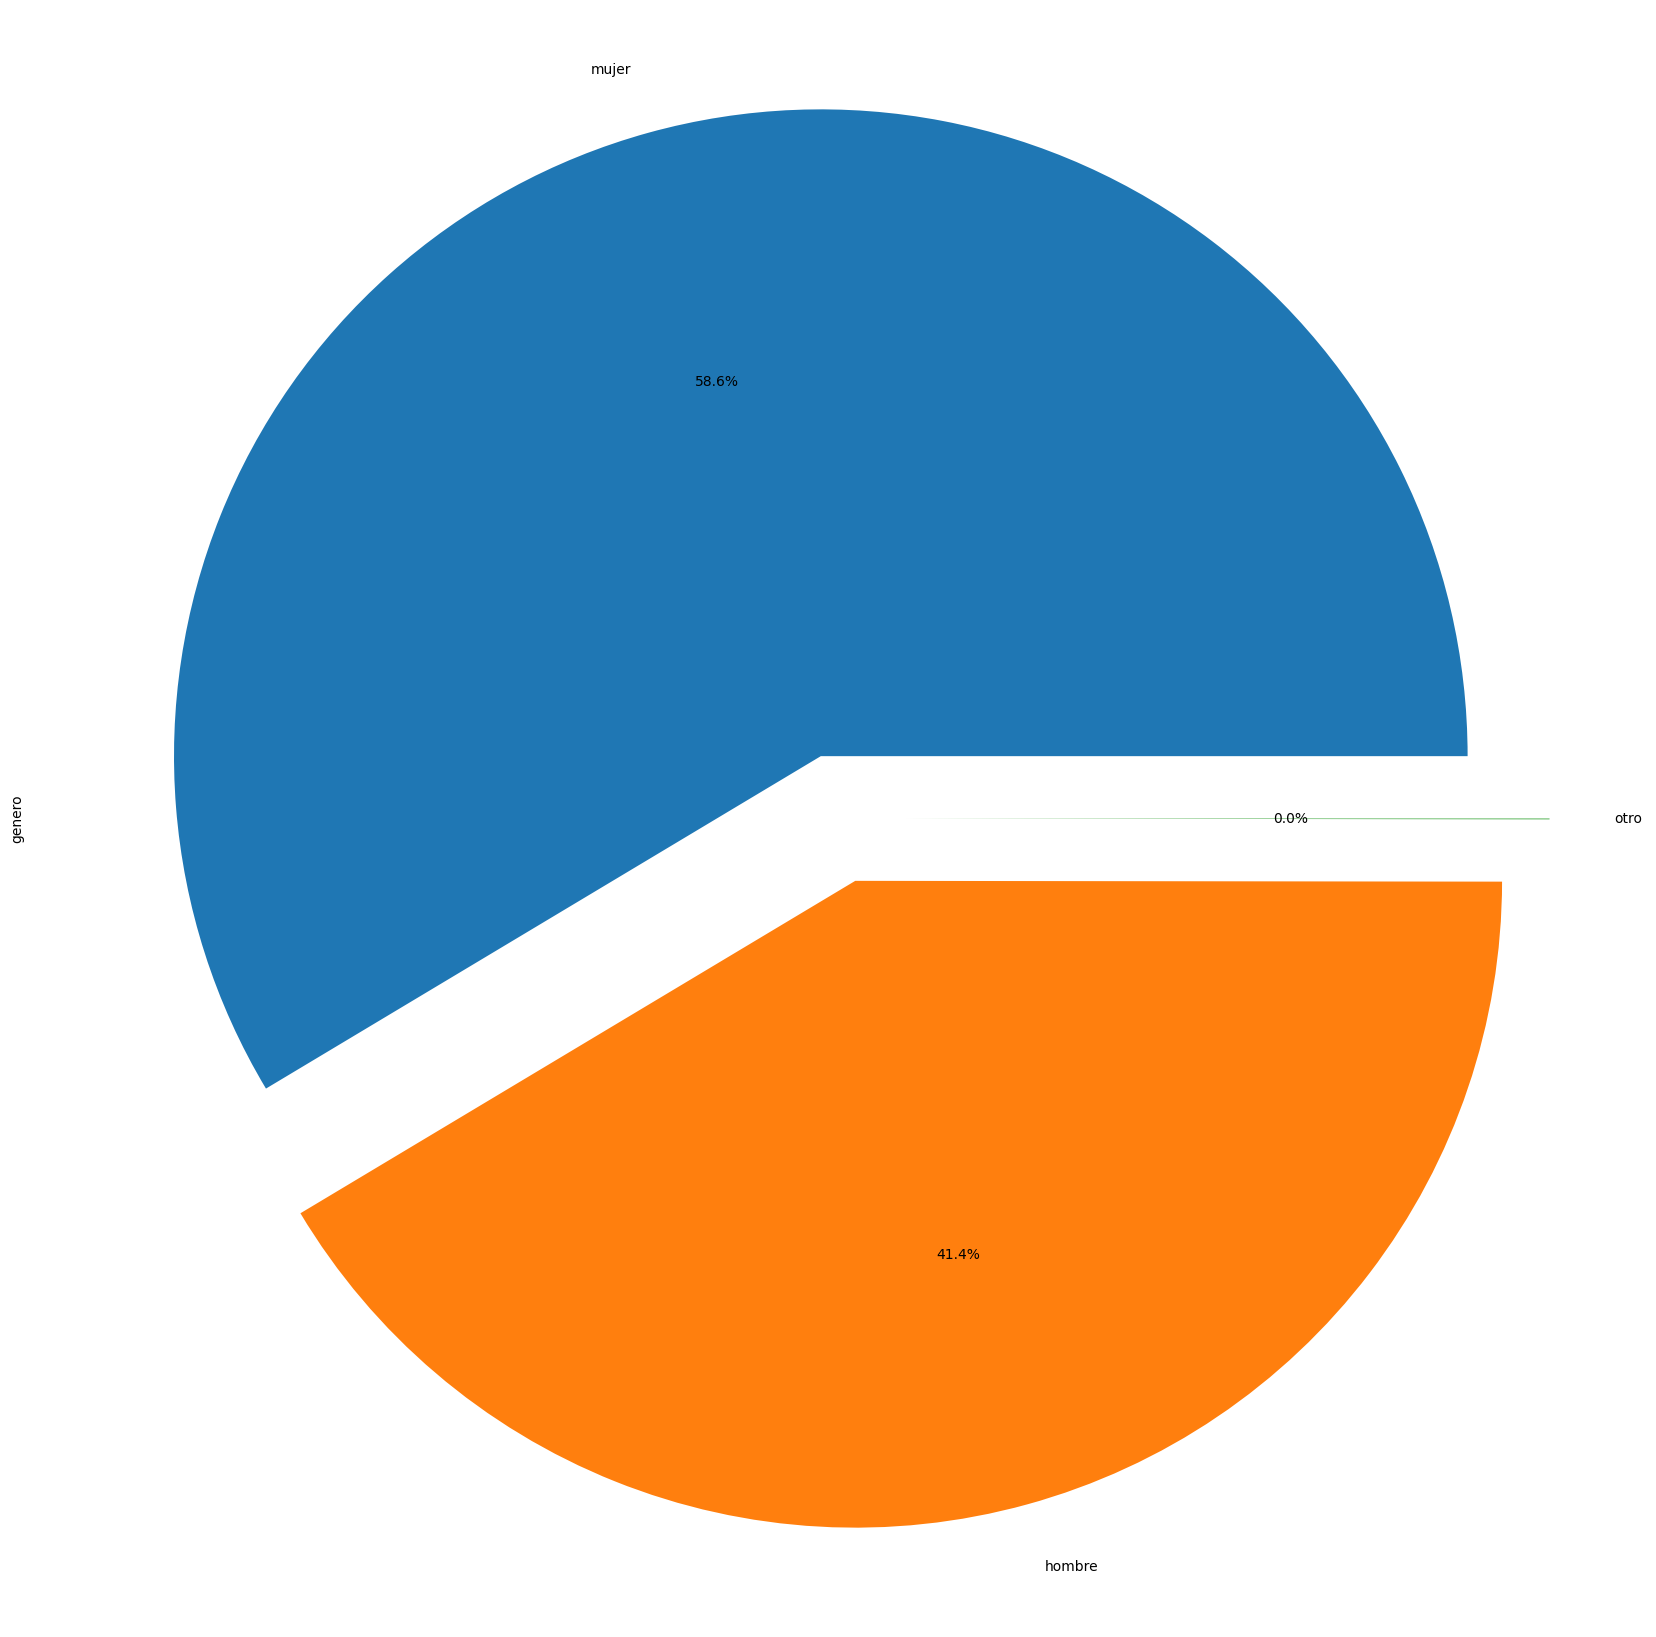

In [1287]:
dataset['genero'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1, 0.1, 0.1]).set_ylabel('genero')

# Imputación

In [1288]:
dataset.pop('id')
dataset = dataset[dataset['estado_fumador'].notna()]

El código elimina la columna 'id' del DataFrame y luego filtra el DataFrame para incluir solo las filas donde la columna 'estado_fumador' no sea nula.

# Tratamiento de faltantes sin imputar

In [1289]:
dataset['imc'].fillna(dataset['imc'].median(), inplace=True)
# Se vuelve a contabilizar para testear la actualización
dataset.isna().sum()

genero                0
edad                  0
hipertension          0
enfermedad_corazon    0
casado_alguna_vez     0
tipo_trabajo          0
tipo_residencia       0
nivel_glucosa         0
imc                   0
estado_fumador        0
apoplejia             0
dtype: int64

Este código rellena los valores faltantes en la columna 'imc' del DataFrame dataset con la mediana de los valores presentes en esa columna

In [1290]:
dataset

,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
0,hombre,67.0,0,1,1,privado,urbano,228.69,36.6,fumaba,1
1,mujer,61.0,0,0,1,autonomo,rural,202.21,29.1,nunca,1
2,hombre,80.0,0,1,1,privado,rural,105.92,32.5,nunca,1
3,mujer,49.0,0,0,1,privado,urbano,171.23,34.4,fuma,1
4,mujer,79.0,1,0,1,autonomo,rural,174.12,24.0,nunca,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,mujer,57.0,0,0,1,privado,rural,77.93,21.7,nunca,0
5105,mujer,80.0,1,0,1,privado,urbano,83.75,29.1,nunca,0
5106,mujer,81.0,0,0,1,autonomo,urbano,125.20,40.0,nunca,0
5107,mujer,35.0,0,0,1,autonomo,rural,82.99,30.6,nunca,0


# Correlación entre variables

In [1291]:
# Transformación de datos
from sklearn.preprocessing import LabelEncoder

# sklearn lo utilizamos después para clasificación, regresión, redes neuronales. Pero no viene mal pispear algunas de sus cualidades ya.

le = LabelEncoder()

for col in dataset.columns:
    if dataset[col].dtype == 'object':
        # Si son columnas 'object', se codifican como numéricas. En esencia, siguen siendo categóricas.
        dataset[col] = le.fit_transform(dataset[col])   # Con le.inverse_transform() recuperamos luego la etiqueta original

In [1292]:
for col in dataset.columns:
    if dataset[col].dtype == 'object' or (dataset[col].dtype == 'int64'):
        print(col,"->", dataset[col].unique())

# Ahora tenemos números en lugar de palabras, estamos más cerca de poder operar matemáticamente la información contenida en el dataset

hipertension -> [0 1]
enfermedad_corazon -> [1 0]
casado_alguna_vez -> [1 0]
apoplejia -> [1 0]


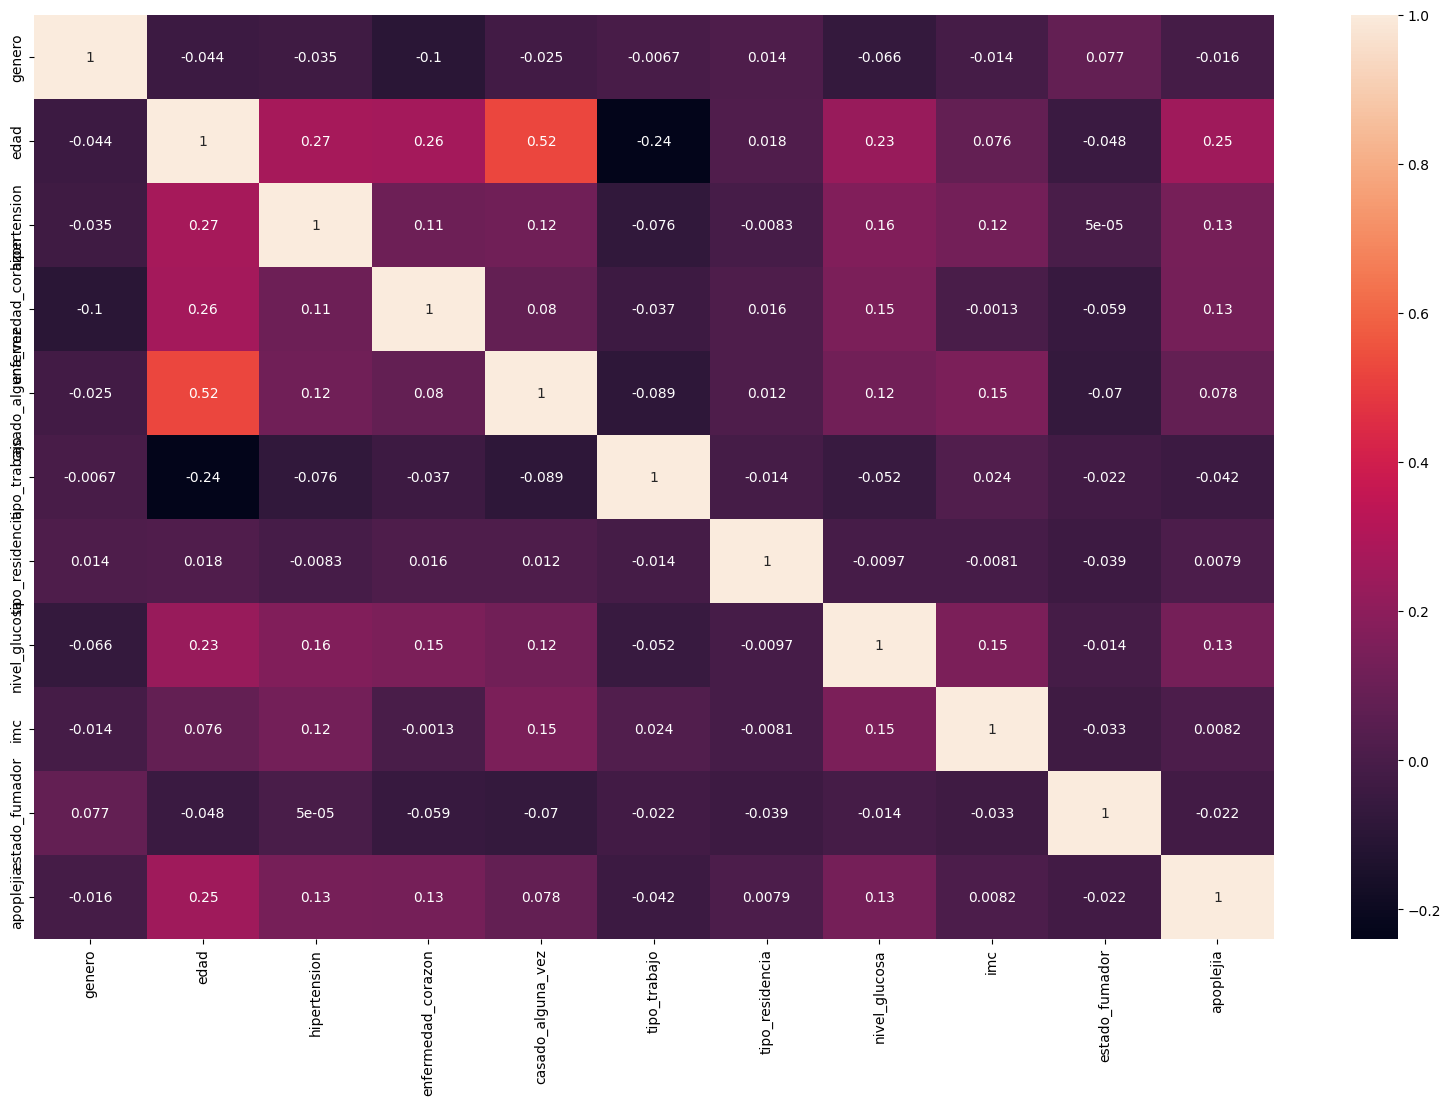

In [1293]:
sns.heatmap(data=dataset.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()


Podemos ver el mapa de correlaciones entre las distintas variables, y afirmar que la correlacion mas fuerte que existe es entre la edad y casado_alguna_vez

# Outliers

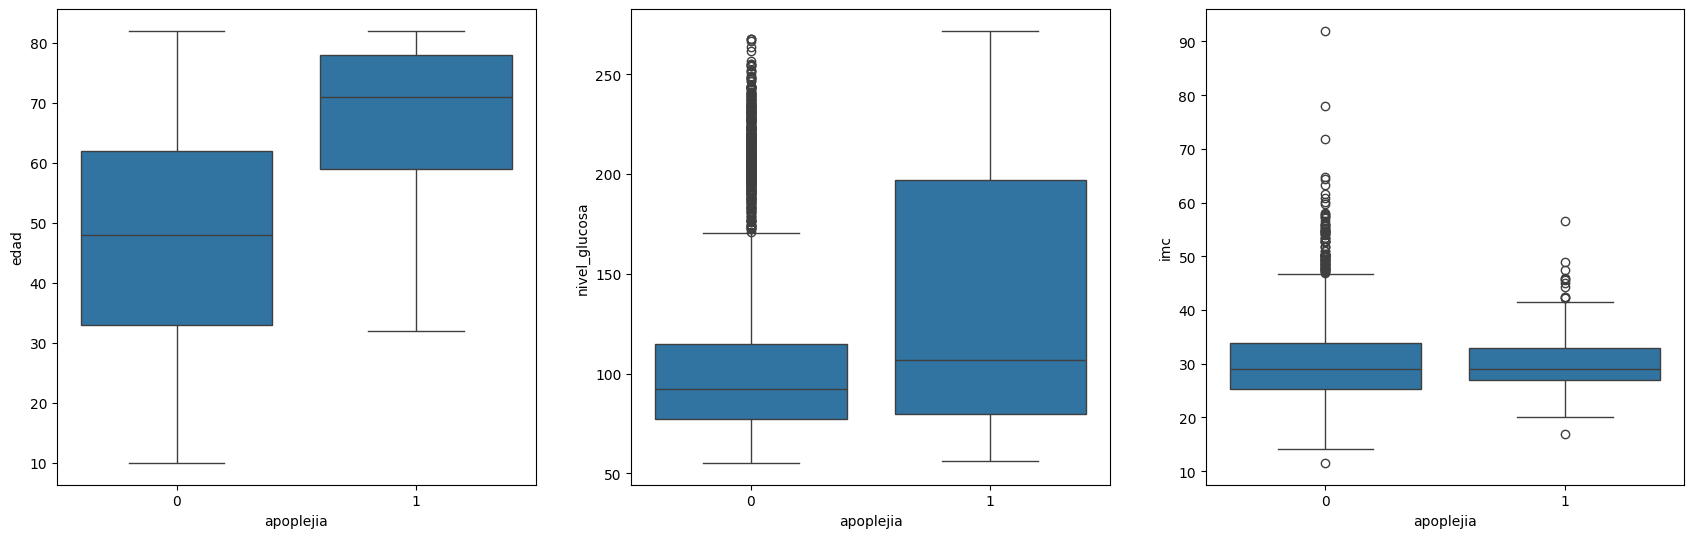

In [1294]:
dataset_numericas = dataset.select_dtypes('float64')    # Tiene sentido buscar outliers en datos flotantes

plt.rcParams['figure.figsize'] = (21,21)
for i, col in enumerate(dataset_numericas.columns, 1):
    plt.subplot(3,3,i)
    ax = sns.boxplot(y = col , x = "apoplejia", data = dataset)

In [1295]:
# Ejemplo de descarte a partir de umbrales
dataset = dataset.drop(index=dataset.query('imc > 80 | nivel_glucosa > 250').index, axis=1)

Este código elimina las filas del dataset que tienen valores de 'imc' mayores que 80 o valores de 'nivel_glucosa' mayores que 250.

In [1296]:
dataset

,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
0,0,67.0,0,1,1,4,1,228.69,36.6,1,1
1,1,61.0,0,0,1,0,0,202.21,29.1,2,1
2,0,80.0,0,1,1,4,0,105.92,32.5,2,1
3,1,49.0,0,0,1,4,1,171.23,34.4,0,1
4,1,79.0,1,0,1,0,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,4,0,77.93,21.7,2,0
5105,1,80.0,1,0,1,4,1,83.75,29.1,2,0
5106,1,81.0,0,0,1,0,1,125.20,40.0,2,0
5107,1,35.0,0,0,1,0,0,82.99,30.6,2,0


In [1297]:
# Originalmente tenía poco más de 5100 entradas, de las cuáles se han determinado bajo riguroso análisis que son válidas:
len(dataset)

3544

# Muestra Metricas

In [1298]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
import time

# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted') # average permite definir cómo se computan estas métricas para múltiples clases de salida
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))    # Matthews correlation coefficient: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]

# RNA - Topología manual

In [1299]:
dataset

,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador,apoplejia
0,0,67.0,0,1,1,4,1,228.69,36.6,1,1
1,1,61.0,0,0,1,0,0,202.21,29.1,2,1
2,0,80.0,0,1,1,4,0,105.92,32.5,2,1
3,1,49.0,0,0,1,4,1,171.23,34.4,0,1
4,1,79.0,1,0,1,0,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,57.0,0,0,1,4,0,77.93,21.7,2,0
5105,1,80.0,1,0,1,4,1,83.75,29.1,2,0
5106,1,81.0,0,0,1,0,1,125.20,40.0,2,0
5107,1,35.0,0,0,1,0,0,82.99,30.6,2,0


In [1300]:
# Tratamiento de los datos y división del dataset

# Definición de la columna de salida esperada (aprendizaje supervisado)
y_data = dataset.pop('apoplejia')
y_data = np.asarray(y_data).astype('float32')

# Preprocesamiento
# Se codifica numéricamente las categorías definidas con etiquetas. Ej.: en lugar de “urbano” y “rural” en tipo_residencia, queda 0 y 1.
le = LabelEncoder()
# Similar al proceso de escalado en el TP8, mejora el rendimiento.
ss = StandardScaler()

for col in dataset.columns:
    if dataset[col].dtype == 'object':
        # Si son columnas 'object', se codifican como numéricas. En esencia, siguen siendo categóricas.
        dataset[col] = le.fit_transform(dataset[col])
    elif dataset[col].dtype == 'int64':
        # Conversión a arreglo de numpy, más velocidad en el procesamiento
        dataset[col] = np.asarray(dataset[col]).astype('float64')
    else:
        # Escalado
        dataset[col] = ss.fit_transform(dataset[[col]])

In [1301]:
dataset

,genero,edad,hipertension,enfermedad_corazon,casado_alguna_vez,tipo_trabajo,tipo_residencia,nivel_glucosa,imc,estado_fumador
0,-1.238973,0.967513,0.0,1.0,1.0,0.693928,0.982656,2.563933,0.899460,-0.383243
1,0.805217,0.649289,0.0,0.0,1.0,-1.821317,-1.017650,2.000876,-0.158218,0.851495
2,-1.238973,1.656998,0.0,1.0,1.0,0.693928,-1.017650,-0.046584,0.321263,0.851495
3,0.805217,0.012840,0.0,0.0,1.0,0.693928,0.982656,1.342134,0.589208,-1.617981
4,0.805217,1.603961,1.0,0.0,1.0,-1.821317,-1.017650,1.403585,-0.877439,0.851495
...,...,...,...,...,...,...,...,...,...,...
5102,0.805217,0.437139,0.0,0.0,1.0,0.693928,-1.017650,-0.641749,-1.201793,0.851495
5105,0.805217,1.656998,1.0,0.0,1.0,0.693928,0.982656,-0.517996,-0.158218,0.851495
5106,0.805217,1.710036,0.0,0.0,1.0,-1.821317,0.982656,0.363376,1.378940,0.851495
5107,0.805217,-0.729683,0.0,0.0,1.0,-1.821317,-1.017650,-0.534156,0.053318,0.851495


In [1302]:
# Para tener el estado actual de la cantidad de datos resultantes en el procesamiento previo. Si se imputan las filas con N/A, disminuye bastante por ej.
print("Tamaño actual - Salida:", y_data.shape)

Tamaño actual - Salida: (3544,)


In [1303]:
x_data = np.asarray(dataset) # Esto se puede hacer directamente porque para y_train se usó pop sobre el dataframe.
print("Tamaño actual - Entrada:", x_data.shape) # Es importante que el tamaño sea consistente entre X e Y.

Tamaño actual - Entrada: (3544, 10)


In [1304]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

In [1305]:
y_test

array([0., 1., 0., ..., 0., 0., 0.], dtype=float32)

In [1306]:
# Definición del tipo de modelo, capas, tamaños, etc.

"""
Más tipos de capas y funciones de activación en 'layers' de tensorflow
Ej.: from tensorflow.keras.layers import LeakyReLU, PReLU
softmax, softplus, softsign, tanh, selu, elu, exponential...
Cada una tiene sus propios argumentos. Ver ejemplos en: https://keras.io/api/layers/activations/
Para las capas, divertirse con: https://keras.io/api/layers/

Pequeña guía con ejemplos: https://www.tutorialspoint.com/keras/keras_layers.htm
En esta última, se presenta cuestiones como la inicialización personalizada de los pesos,
establecer límites para los mismos, etc.
"""
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],))) # Es importante el tamaño de la capa de entrada
model.add(layers.Dropout(0.2)) # Es una estrategia para hacer robusto al modelo. Se indica una probabilidad para el apagado aleatorio de las neuronas de la capa.
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# Para visualizar la topología resultante
model.summary()

# Notar que aparece un término como "Non-trainable params". Esto se utiliza por ejemplo, para transferencia de aprendizaje
# Podemos utilizar un red entrenada para algo parecido a nuestras necesidades, bloqueamos el entrenamiento en ciertas capas, y entrenamos solamente las capas nuevas.
# Es un adelanto simplemente :)

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_662 (Dense)                    │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_596 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_663 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_597 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_664 (Dense)                    │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_598 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_665 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_599 (Dropout)                │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_666 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_600 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_667 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_601 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_668 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_602 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_669 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_603 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_670 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_604 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_671 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_605 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_672 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 200,641 (783.75 KB)

 Trainable params: 200,641 (783.75 KB)

 Non-trainable params: 0 (0.00 B)

In [1307]:
# Se define el optimizador a utilizar, tasa de aprendizaje y otros argumentos a utilizar. Por ej: la métrica de referencia será el accuracy
model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
# Se entrena el modelo y se guardan los resultados. Se define un límite de épocas y el tamaño de lotes a usar.
# El máximo para el lote es la cantidad de datos disponibles, conviene utilizar uno tal que permita un número significativo de mezclas a lo largo de las épocas.
history = model.fit(x_train, y_train, epochs=20, batch_size=128)
end_train = time.time()

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9343 - loss: 0.5776
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9500 - loss: 0.2388
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9399 - loss: 0.2495
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9428 - loss: 0.2175
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9472 - loss: 0.1981
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9414 - loss: 0.2121
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9391 - loss: 0.2162
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9430 - loss: 0.2071
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9451 - loss: 0.1863
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9376 - loss: 0.2173
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9472 - loss: 0.1892
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9499 - lo

In [1308]:
# Evaluación del modelo sobre el set para test
result = model.evaluate(x_test, y_test) # Devuelve pérdida y accuracy
result

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9383 - loss: 0.1929  


[0.18527281284332275, 0.9436089992523193]

In [1309]:
# Obtención de métricas (respecto al set de test siempre)
y_pred = model.predict(x_test)
end_predict = time.time()
# Se redondea la predicción de la salida
y_pred = [1.0 if p > 0.5 else 0 for p in y_pred]




34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [1310]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1004
         1.0       0.00      0.00      0.00        60

    accuracy                           0.94      1064
   macro avg       0.47      0.50      0.49      1064
weighted avg       0.89      0.94      0.92      1064



In [1311]:
muestra_metricas("RNA - Topologia Manual", y_test, y_pred, start, end_train, end_predict)

#######################################
Accuracy: 94.36%
Recall: 94.36%
Precision: 89.04%
F1-Score: 91.62%
MCC: 0.00%
Tiempo de entrenamiento: 5.6596 s
Tiempo de predicción: 0.5737 s
Tiempo total: 6.2333 s
#######################################


In [1312]:
# Visualización de los resultados utilizando la matriz de confusión
confusion_matrix(y_test, y_pred)
# Ahora se confirma la hipótesis de que probablemente la red aprende a decir que no hay ACV para maximizar el accuracy

array([[1004,    0],
       [  60,    0]], dtype=int64)

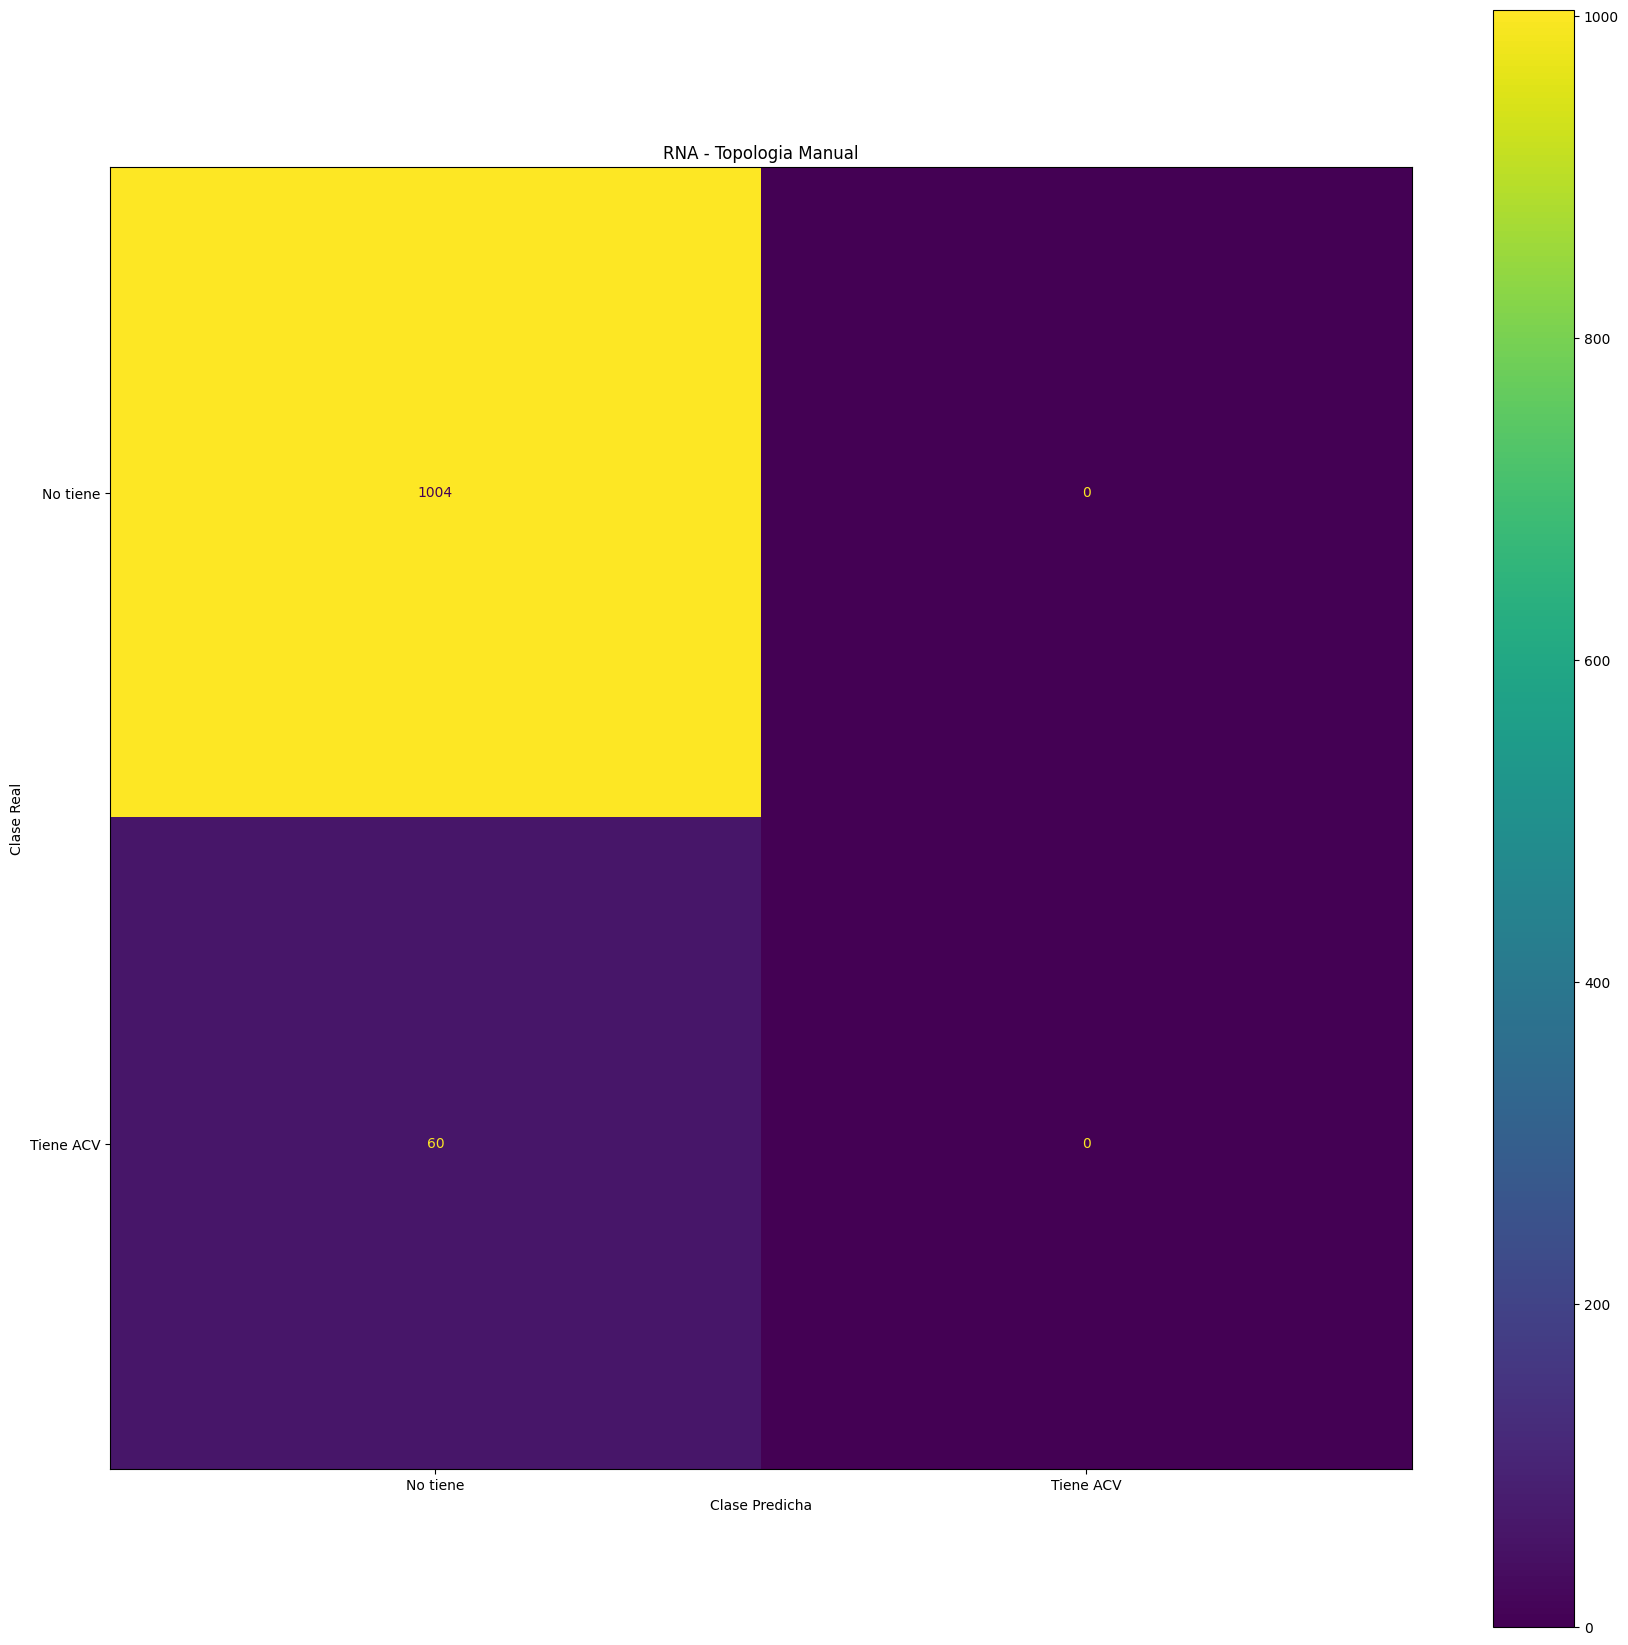

In [1313]:
plot_confusion_matrix(y_test, y_pred, labels=["No tiene","Tiene ACV"], model_name="RNA - Topologia Manual")

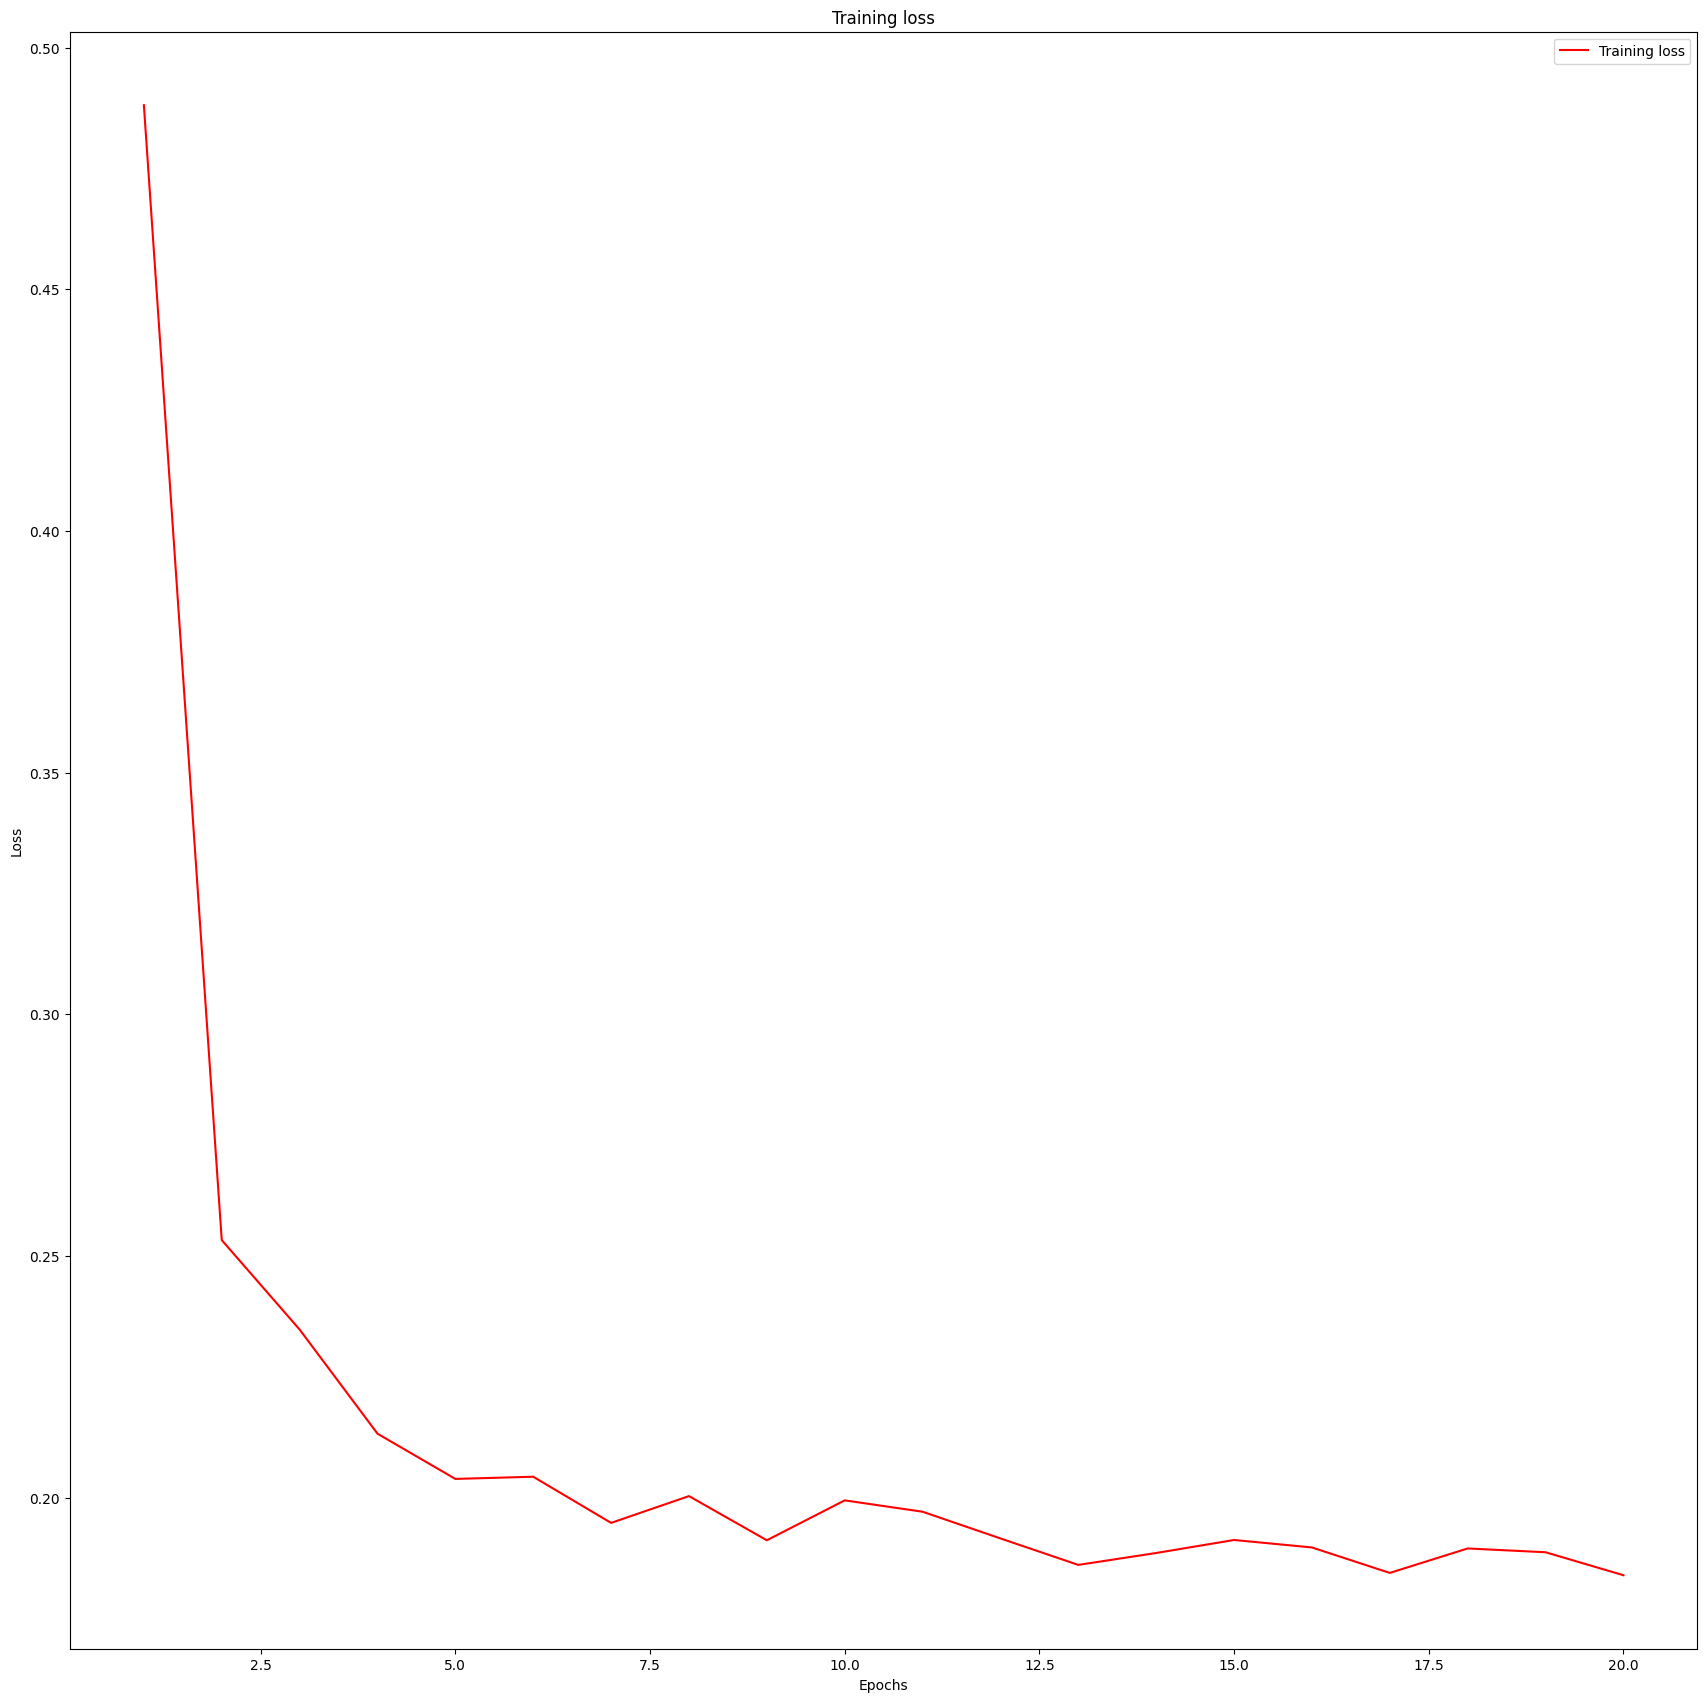

In [1314]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

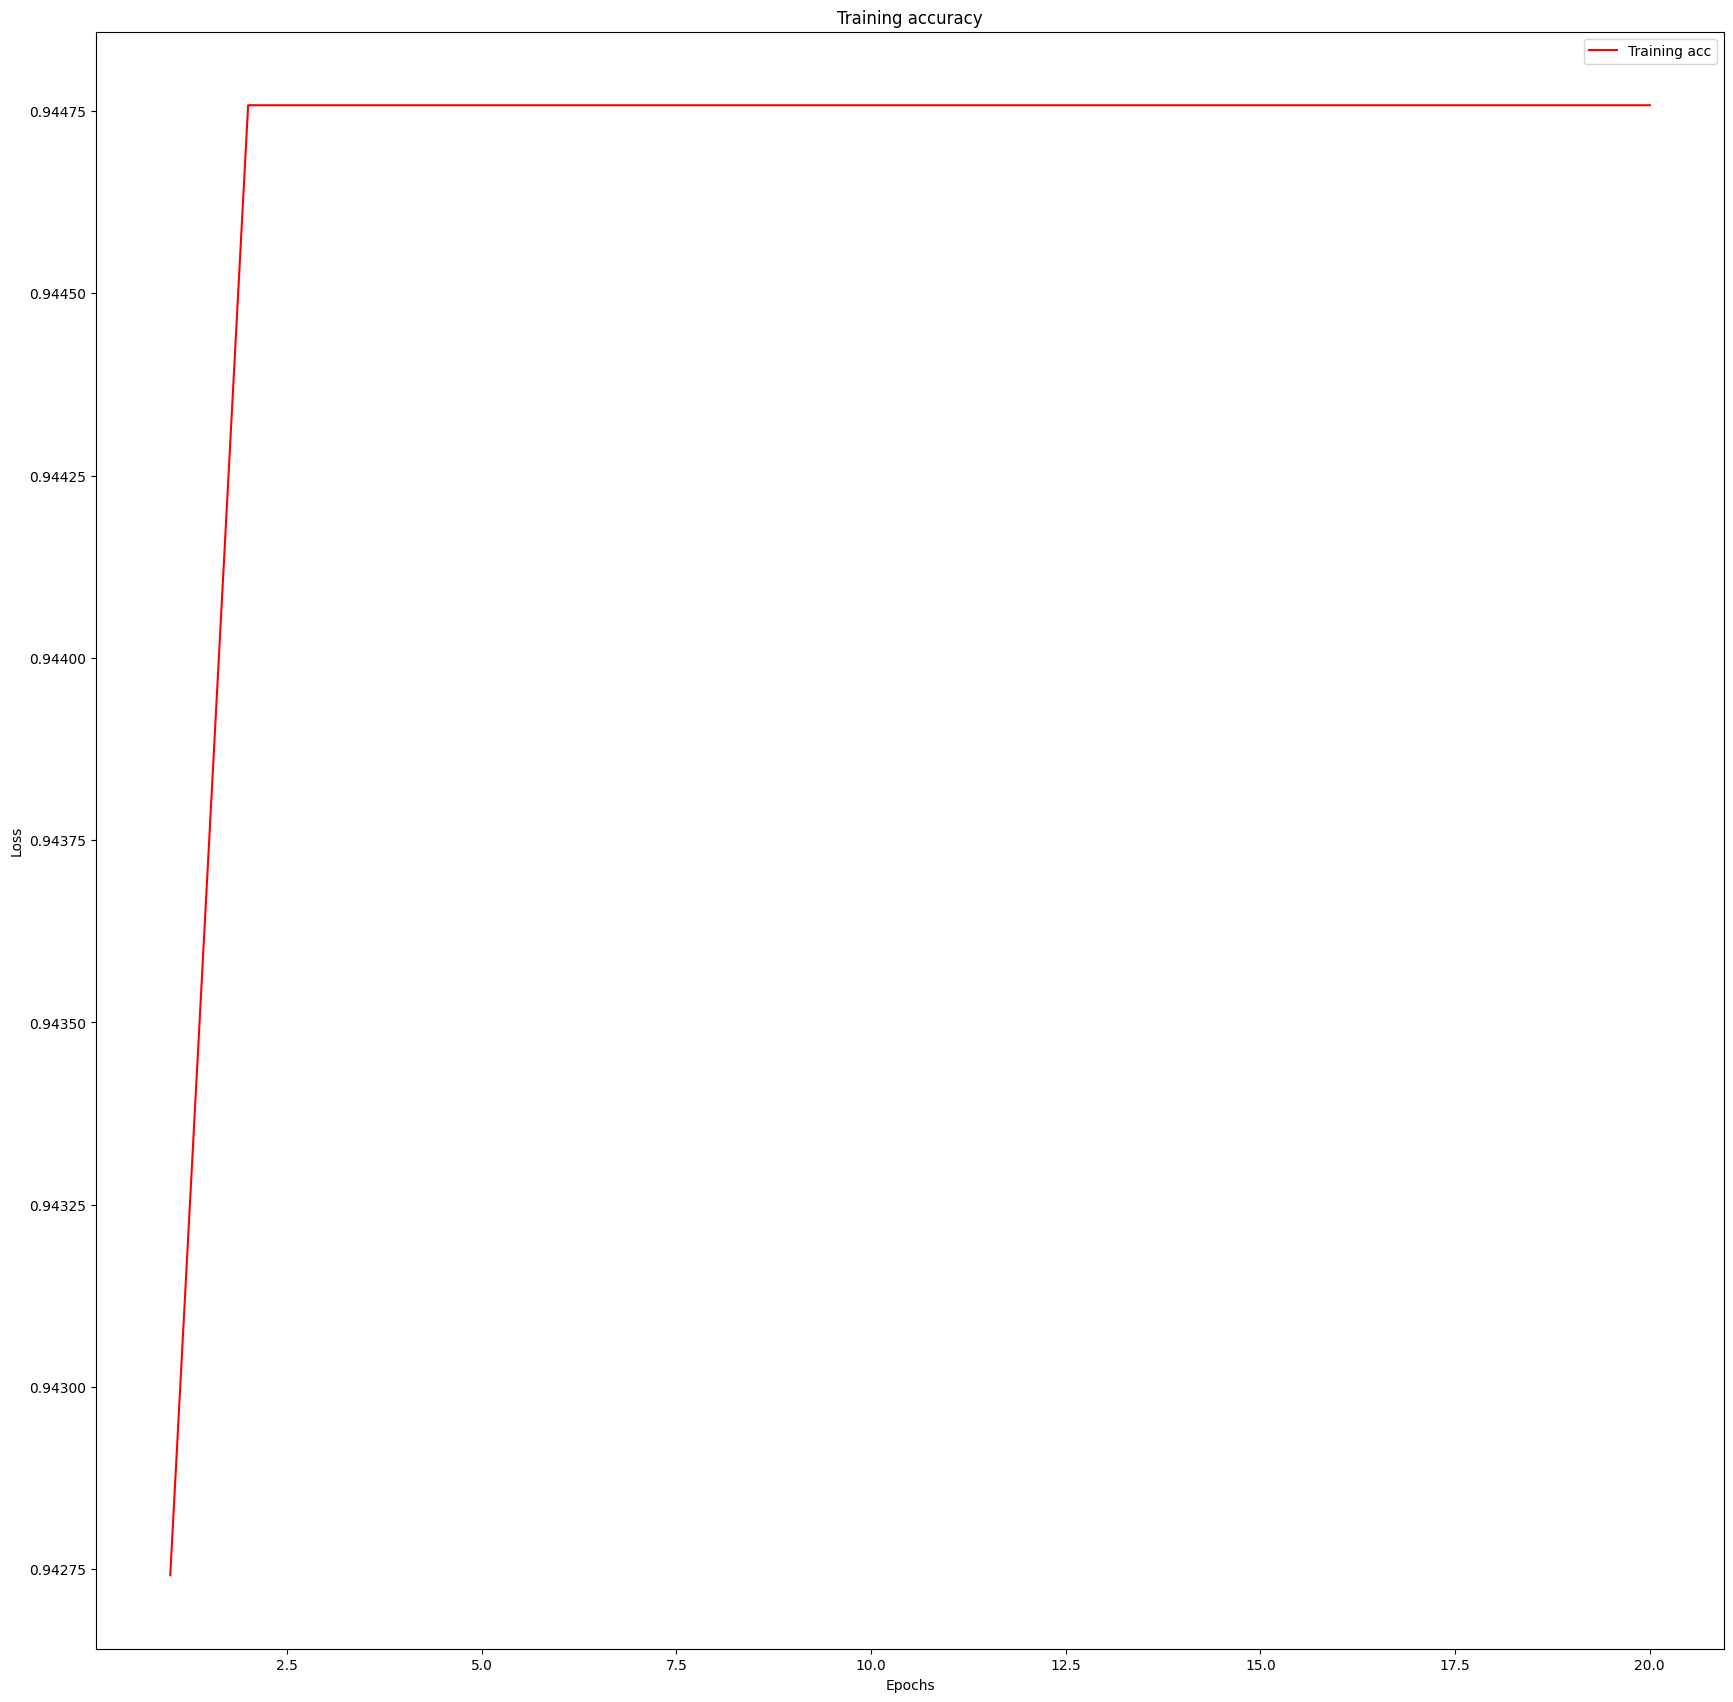

In [1315]:
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1316]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef # Diferentes métricas, hay más. Según el problema conviene mirar alguna o varias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoca")
  plt.ylabel("Valor")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)



In [1317]:
# El set esta bastante desbalanceado. Ya sea train o test, el dataset tiene esa naturaleza.
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
print(" Cantidad '0': {} \n Cantidad '1': {}".format(num_zeros, num_ones))

 Cantidad '0': 2343 
 Cantidad '1': 137


# Balance de clases: pesos

In [1318]:
print(
    "Número de muestras positivas en los datos de entrenamiento: {} ({:.2f}% del total)".format(
        num_ones, 100 * float(num_ones) / len(y_train)
    )
)

weight_for_0 = 1.0 / num_zeros
weight_for_1 = 1.0 / num_ones

Número de muestras positivas en los datos de entrenamiento: 137 (5.52% del total)


In [1319]:
print("Peso para 0: ", weight_for_0)
print("Peso para 1: ", weight_for_1)

Peso para 0:  0.0004268032437046522
Peso para 1:  0.0072992700729927005


In [1320]:
# Con los pesos, armamos un diccionario
class_weight = {0: weight_for_0, 1: weight_for_1}

In [1321]:
class_weight

{0: 0.0004268032437046522, 1: 0.0072992700729927005}

In [1322]:
# Ejemplo de cómo ingresaría a la red el balanceo por pesos
# Es un argumento más. Por defecto, todas las clases tienen la misma ponderación

"""
model.fit(x_train, y_train, epochs=20, batch_size=128,
          class_weight=class_weight)
"""

'\nmodel.fit(x_train, y_train, epochs=20, batch_size=128,\n          class_weight=class_weight)\n'

In [1323]:
# Ejemplo para balancear datos
from imblearn.over_sampling import SMOTE
sm = SMOTE()

x_train, y_train = sm.fit_resample(x_train, y_train)

num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
print(" Cantidad '0': {} \n Cantidad '1': {}".format(num_zeros, num_ones))
# Ahora se equiparan ambas salidas. Investigar como opera esta clase
# En resumen, genera nuevas muestras a partir de las existentes para obtener más entradas de la clase desbalanceada
# La cantidad final resulta igual a la cantidad de la clase mayoritaria previo al resample.

 Cantidad '0': 2343 
 Cantidad '1': 2343


# Re entrenamiento

In [1324]:
# Pruebas sobre la misma RNA
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(x_train, y_train, epochs=20, batch_size=128)
end_train = time.time()

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5019 - loss: 0.6936
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5439 - loss: 0.6904
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6356 - loss: 0.6509
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7454 - loss: 0.5469
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7575 - loss: 0.5116
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7694 - loss: 0.4899
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.4941
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7855 - loss: 0.4636
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7868 - loss: 0.4577
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 0.4548
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7915 - loss: 0.4558
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7873 - lo

In [1325]:
result = model.evaluate(x_test, y_test)
result

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6760 - loss: 0.5239  


[0.5125784873962402, 0.6917293071746826]

In [1326]:
y_pred = model.predict(x_test)
end_predict = time.time()
y_pred = [1.0 if p > 0.5 else 0 for p in y_pred]
print(classification_report(y_test, y_pred))

# Comparar resultados
# No siempre se obtienen mejoras al utilizar técnicas para el aumento de datos

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81      1004
         1.0       0.12      0.68      0.20        60

    accuracy                           0.69      1064
   macro avg       0.55      0.69      0.50      1064
weighted avg       0.93      0.69      0.77      1064



In [1327]:
muestra_metricas("Re Entrenamiento", y_test, y_pred, start, end_train, end_predict)

#######################################
Accuracy: 69.17%
Recall: 69.17%
Precision: 92.51%
F1-Score: 77.47%
MCC: 18.44%
Tiempo de entrenamiento: 7.0885 s
Tiempo de predicción: 0.5655 s
Tiempo total: 7.6540 s
#######################################


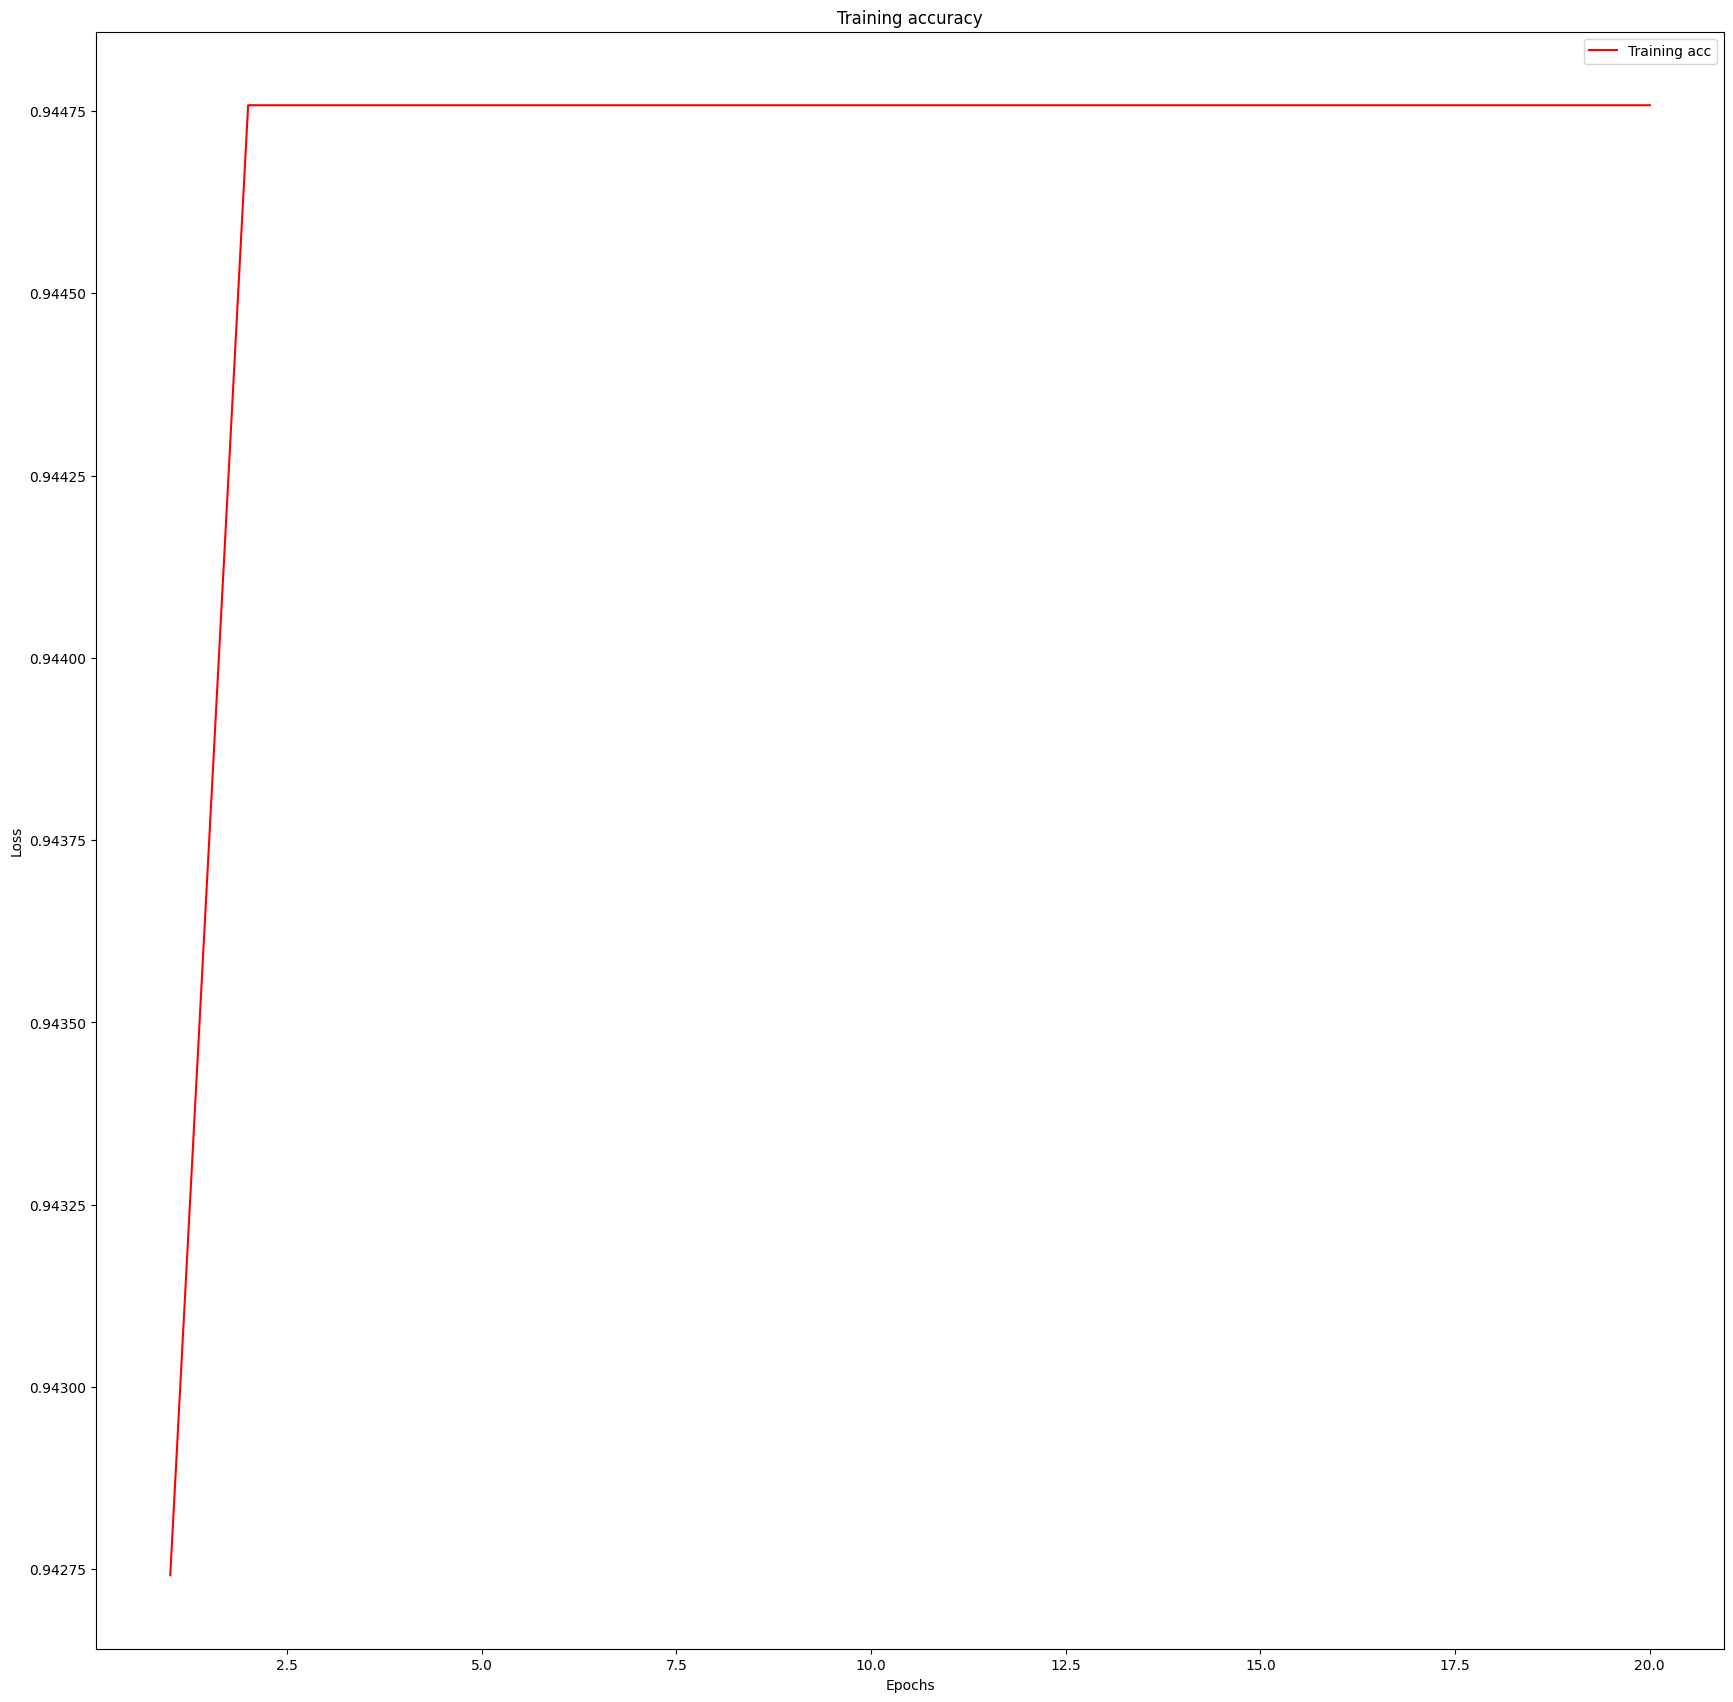

In [1328]:
plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

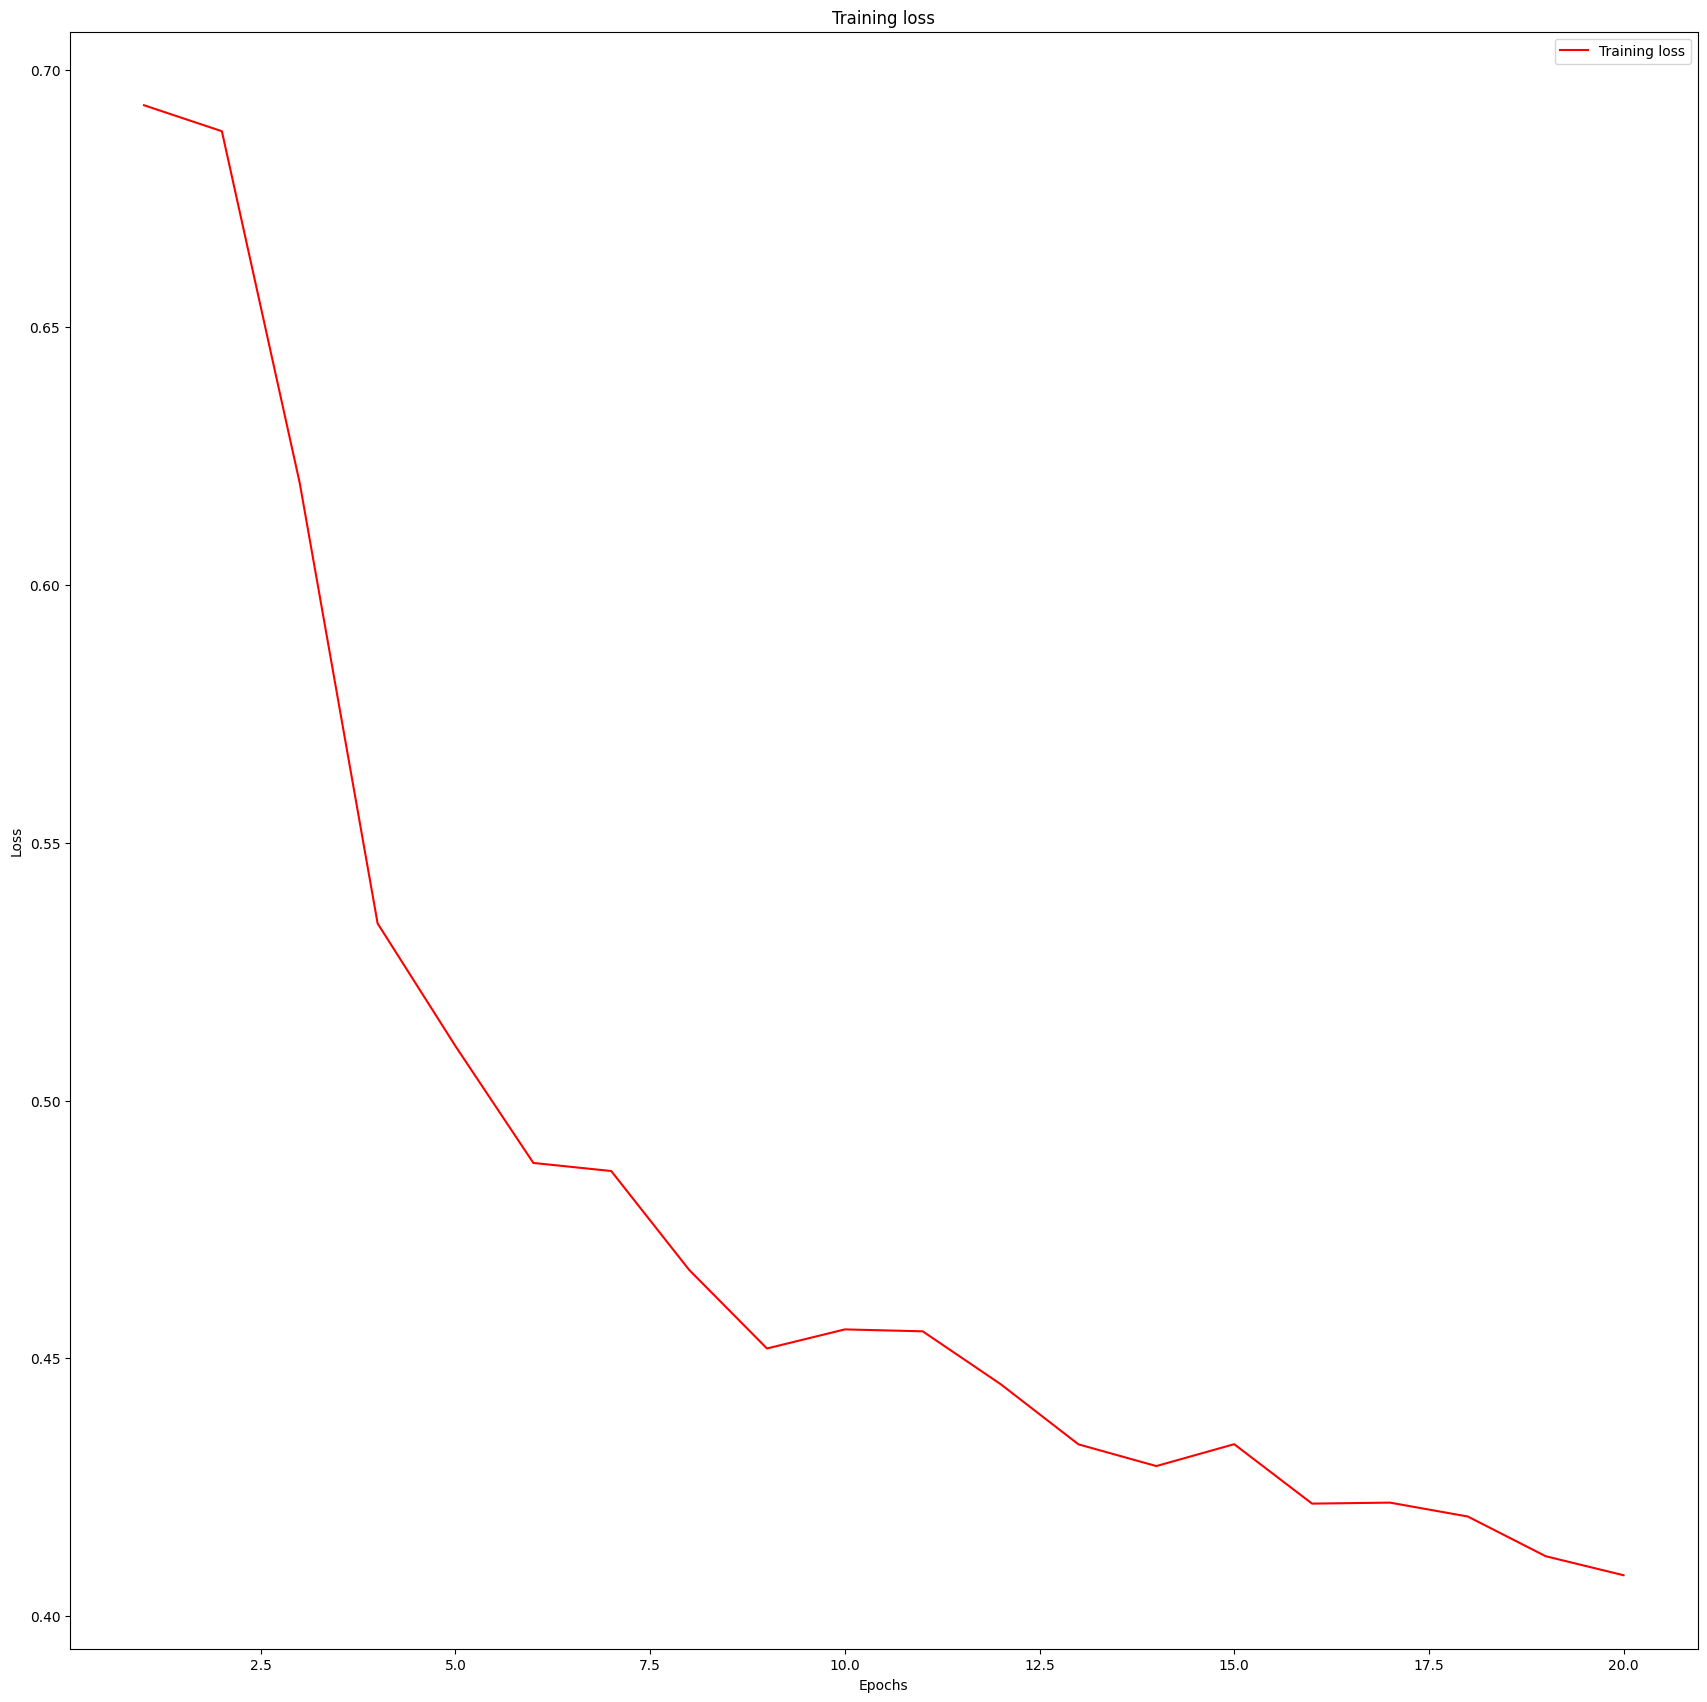

In [1329]:
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1330]:
# Visualización de los resultados utilizando la matriz de confusión
confusion_matrix(y_test, y_pred)


array([[695, 309],
       [ 19,  41]], dtype=int64)

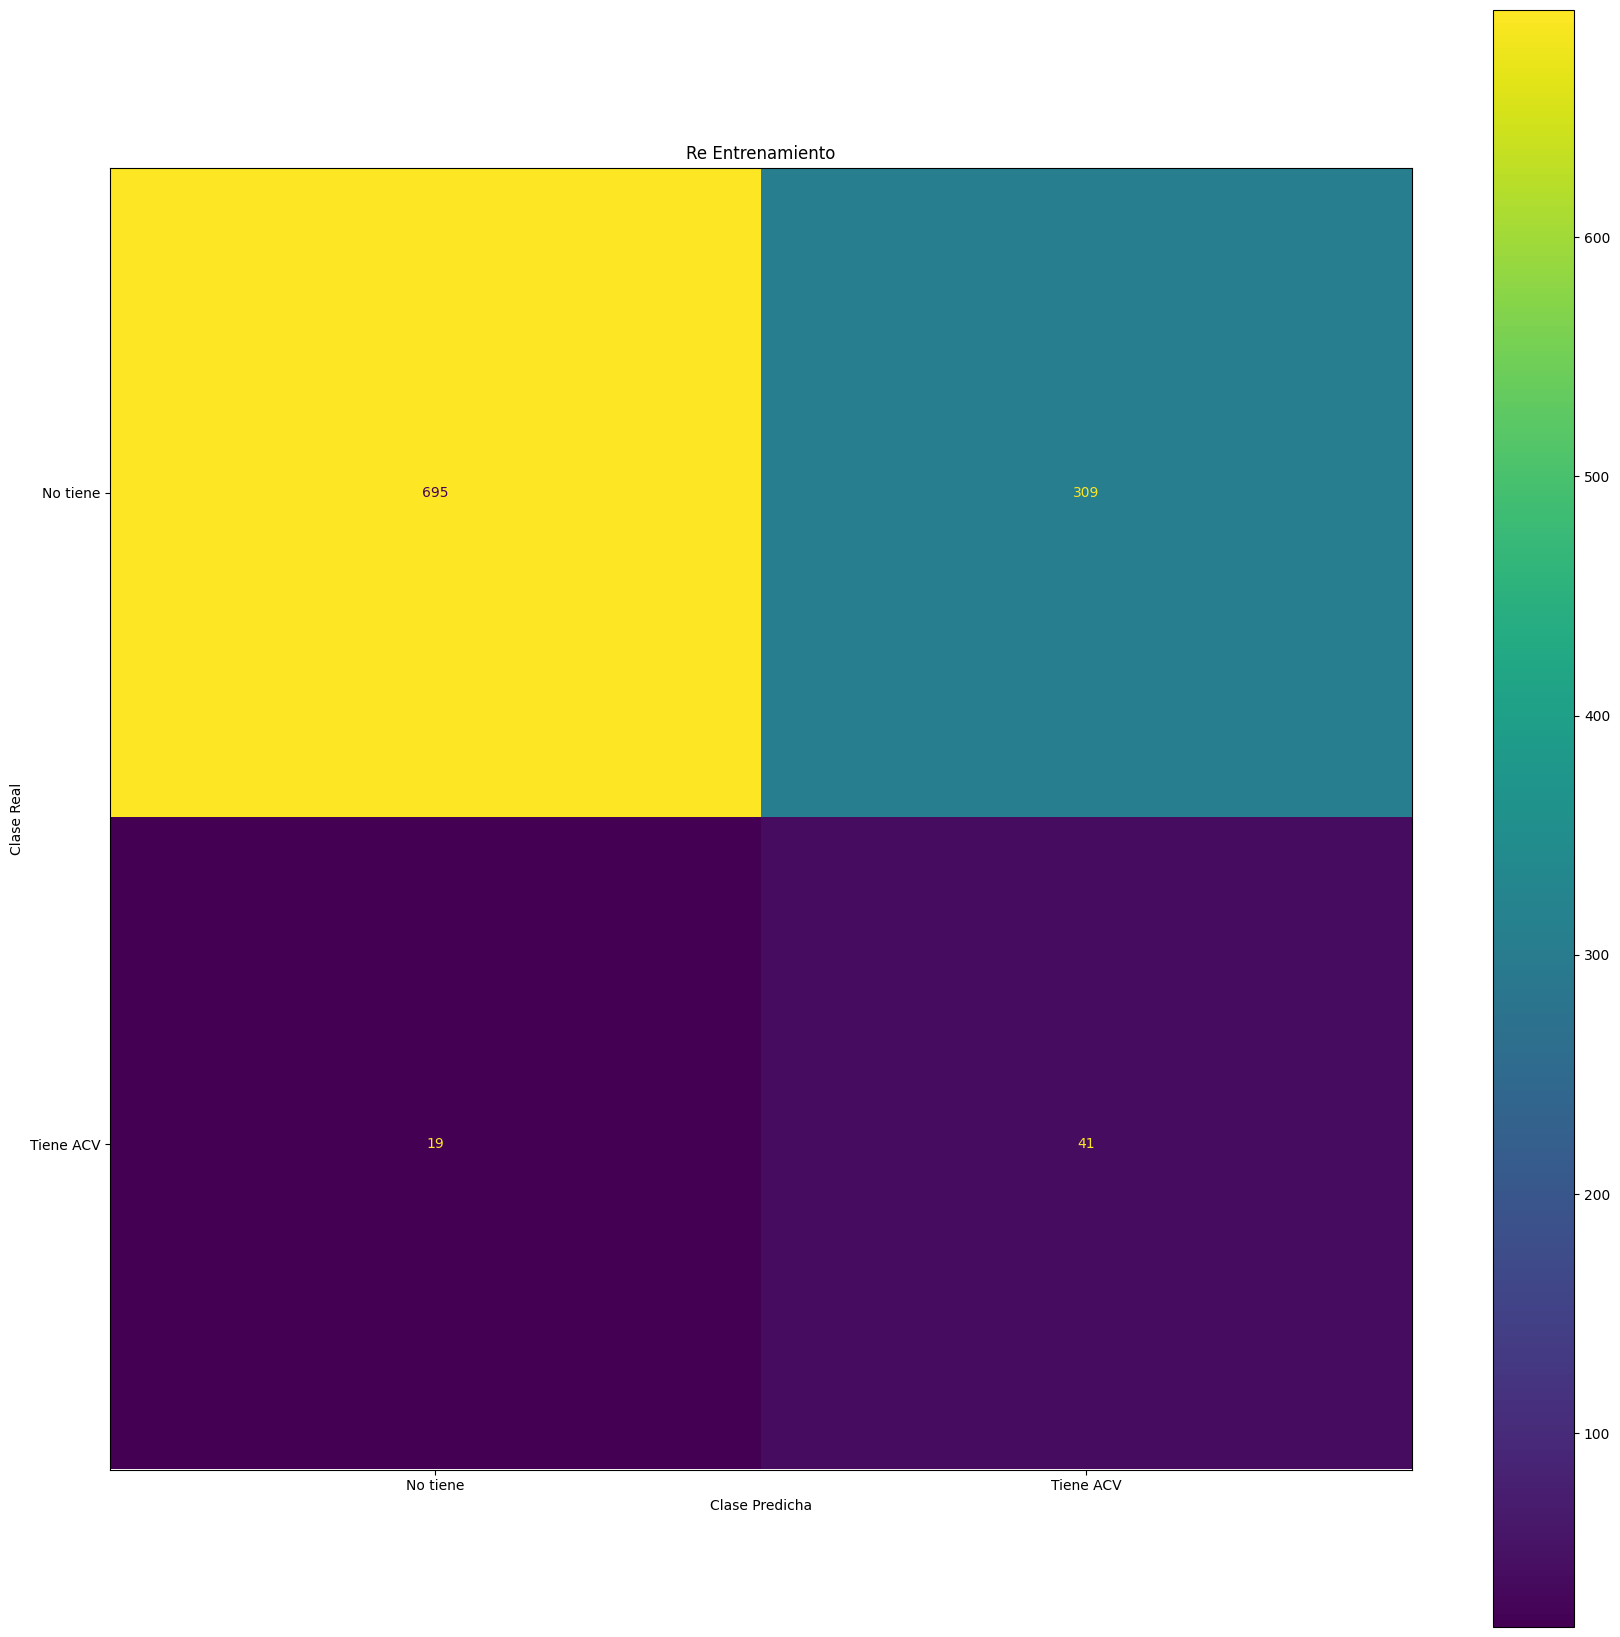

In [1331]:
plot_confusion_matrix(y_test, y_pred, labels=["No tiene","Tiene ACV"], model_name="Re Entrenamiento")

In [1332]:
num_zeros = (y_test == 0).sum()
num_ones = (y_test == 1).sum()
print(" Cantidad '0': {} \n Cantidad '1': {}".format(num_zeros, num_ones))

 Cantidad '0': 1004 
 Cantidad '1': 60


In [1333]:
# El set para train, se puede dividir para validación. Con esto se pueden obtener métricas relacionadas, criterios de parada, etc

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

In [1334]:
# Misma RNA para comparar
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# Criterio de parada
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, restore_best_weights=True)

model.compile(optimizer=optimizers.Adam(learning_rate=2e-4), loss='binary_crossentropy', metrics=['accuracy'])

# En el historial se guardan la información para el proceso con datos de validación
history = model.fit(x_train, y_train, epochs=150, batch_size=300, validation_data=(x_val, y_val), callbacks=early_stopping)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.4847 - loss: 0.6936 - val_accuracy: 0.4979 - val_loss: 0.6928
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5219 - loss: 0.6923 - val_accuracy: 0.5299 - val_loss: 0.6917
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5202 - loss: 0.6919 - val_accuracy: 0.5868 - val_loss: 0.6888
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5484 - loss: 0.6893 - val_accuracy: 0.6003 - val_loss: 0.6830
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5561 - loss: 0.6845 - val_accuracy: 0.7006 - val_loss: 0.6653
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6169 - loss: 0.6686 - val_accuracy: 0.7596 - val_loss: 0.6158
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6899 - loss: 0.6218 - val_accuracy: 0.7660 - val_loss: 0.5339
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7197 - loss: 0.5683 - val_accuracy: 0.7710

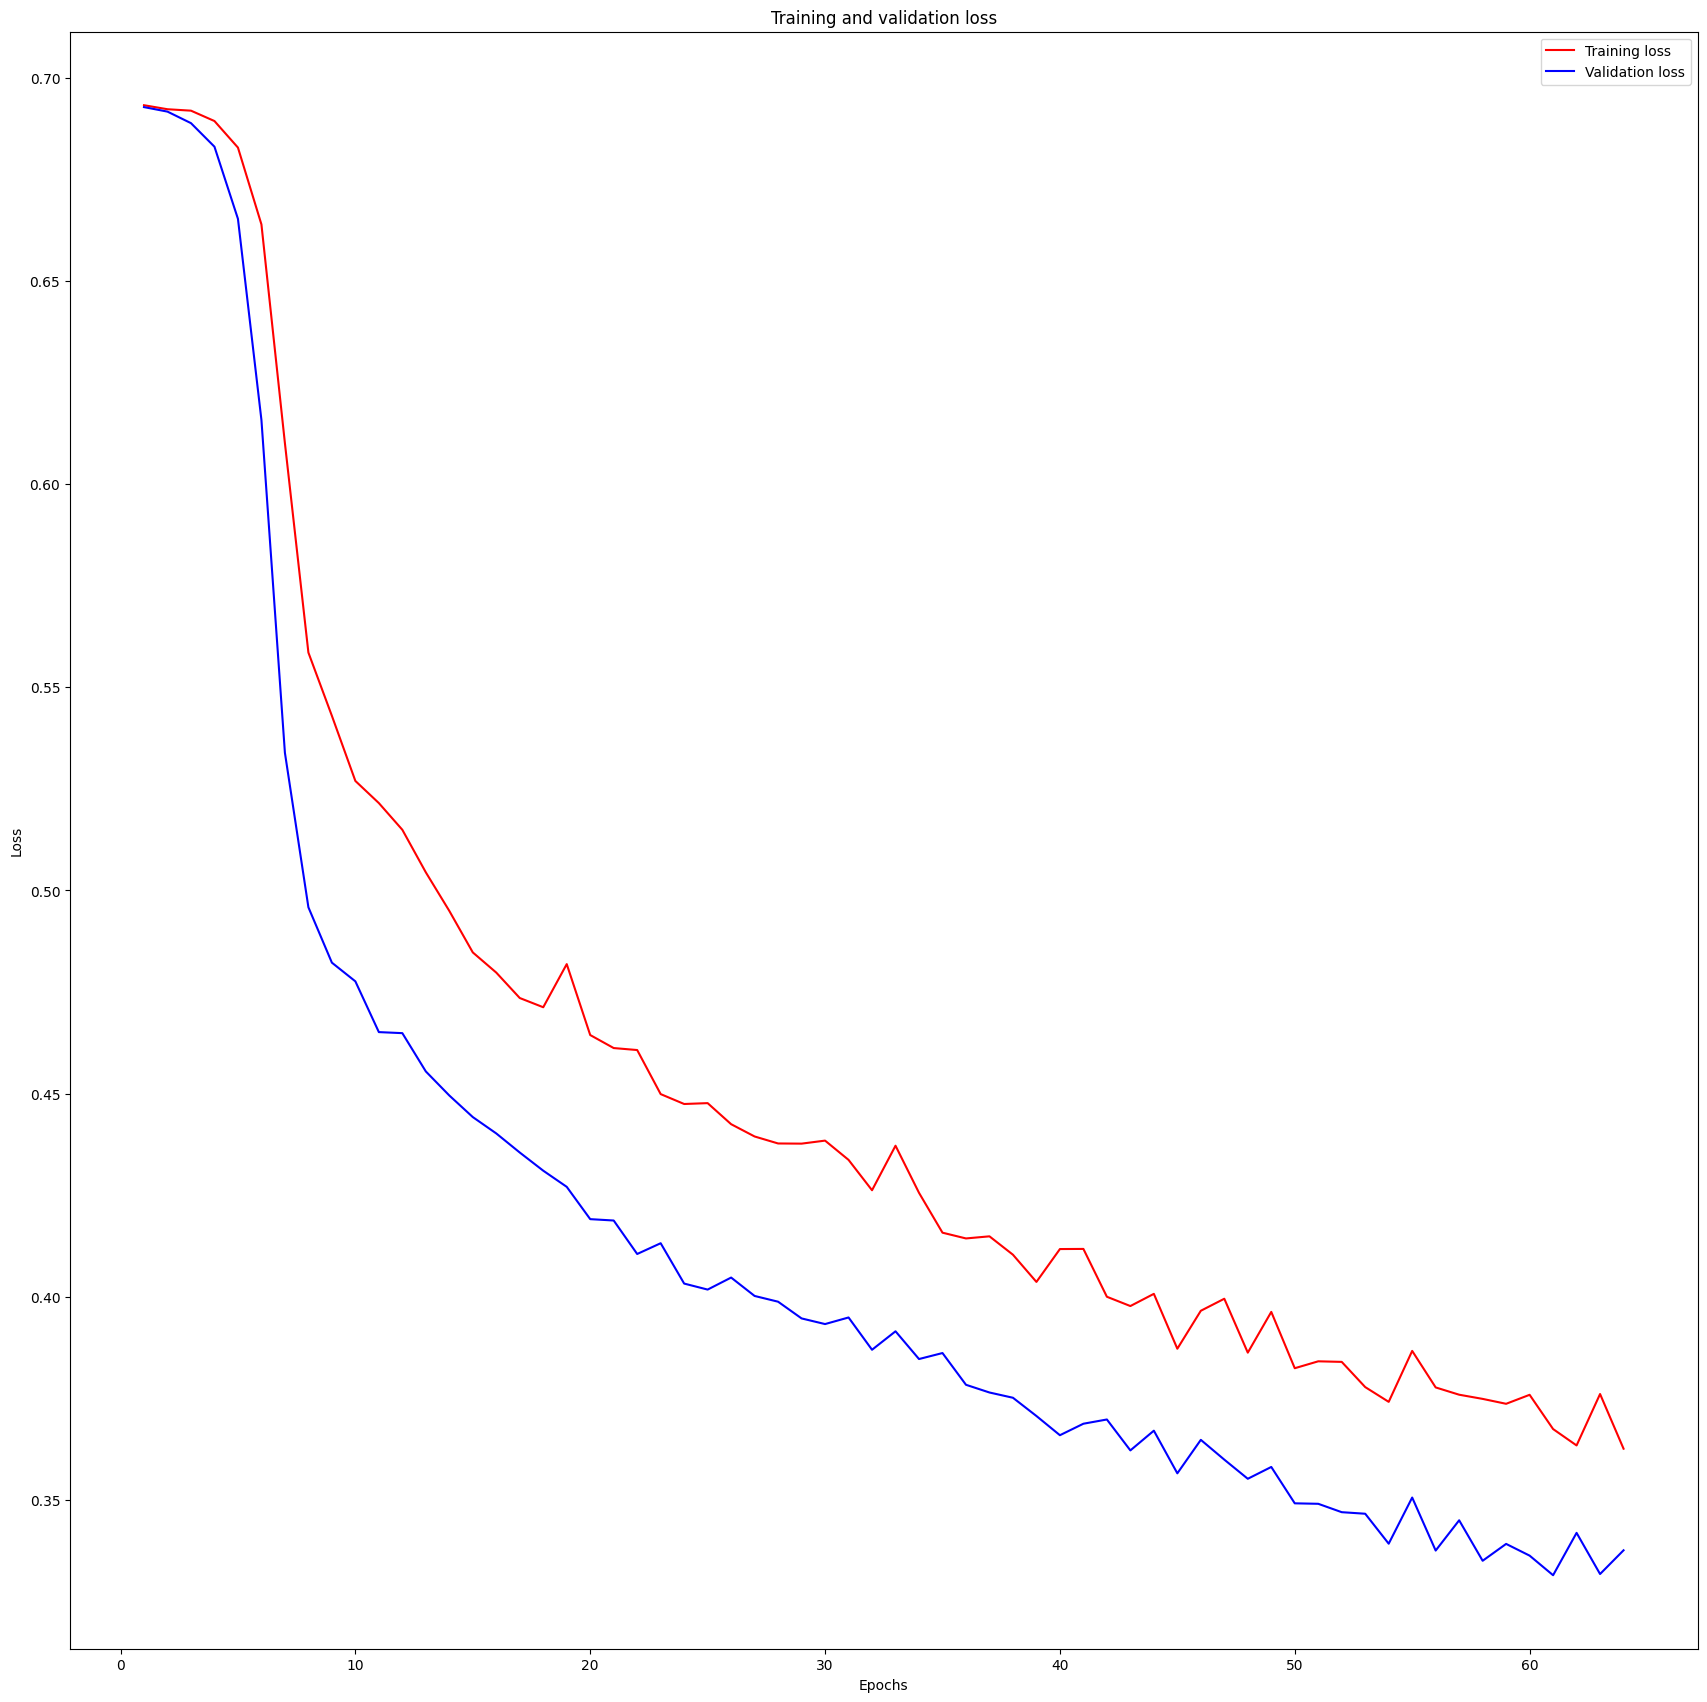

In [1335]:
# Notar que el entrenamiento anterior finalizó en la época 95 de 150, justamente por el nuevo criterio de parada establecido
# Entrena hasta que se cumpla algún criterio
# En este caso, se entrenó hasta un determinado accuracy en el set de train. Es de esperarse, que sobre test se obtenga un resultado muy parecido.

# Ahora se disponen de los datos para el set de validación
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

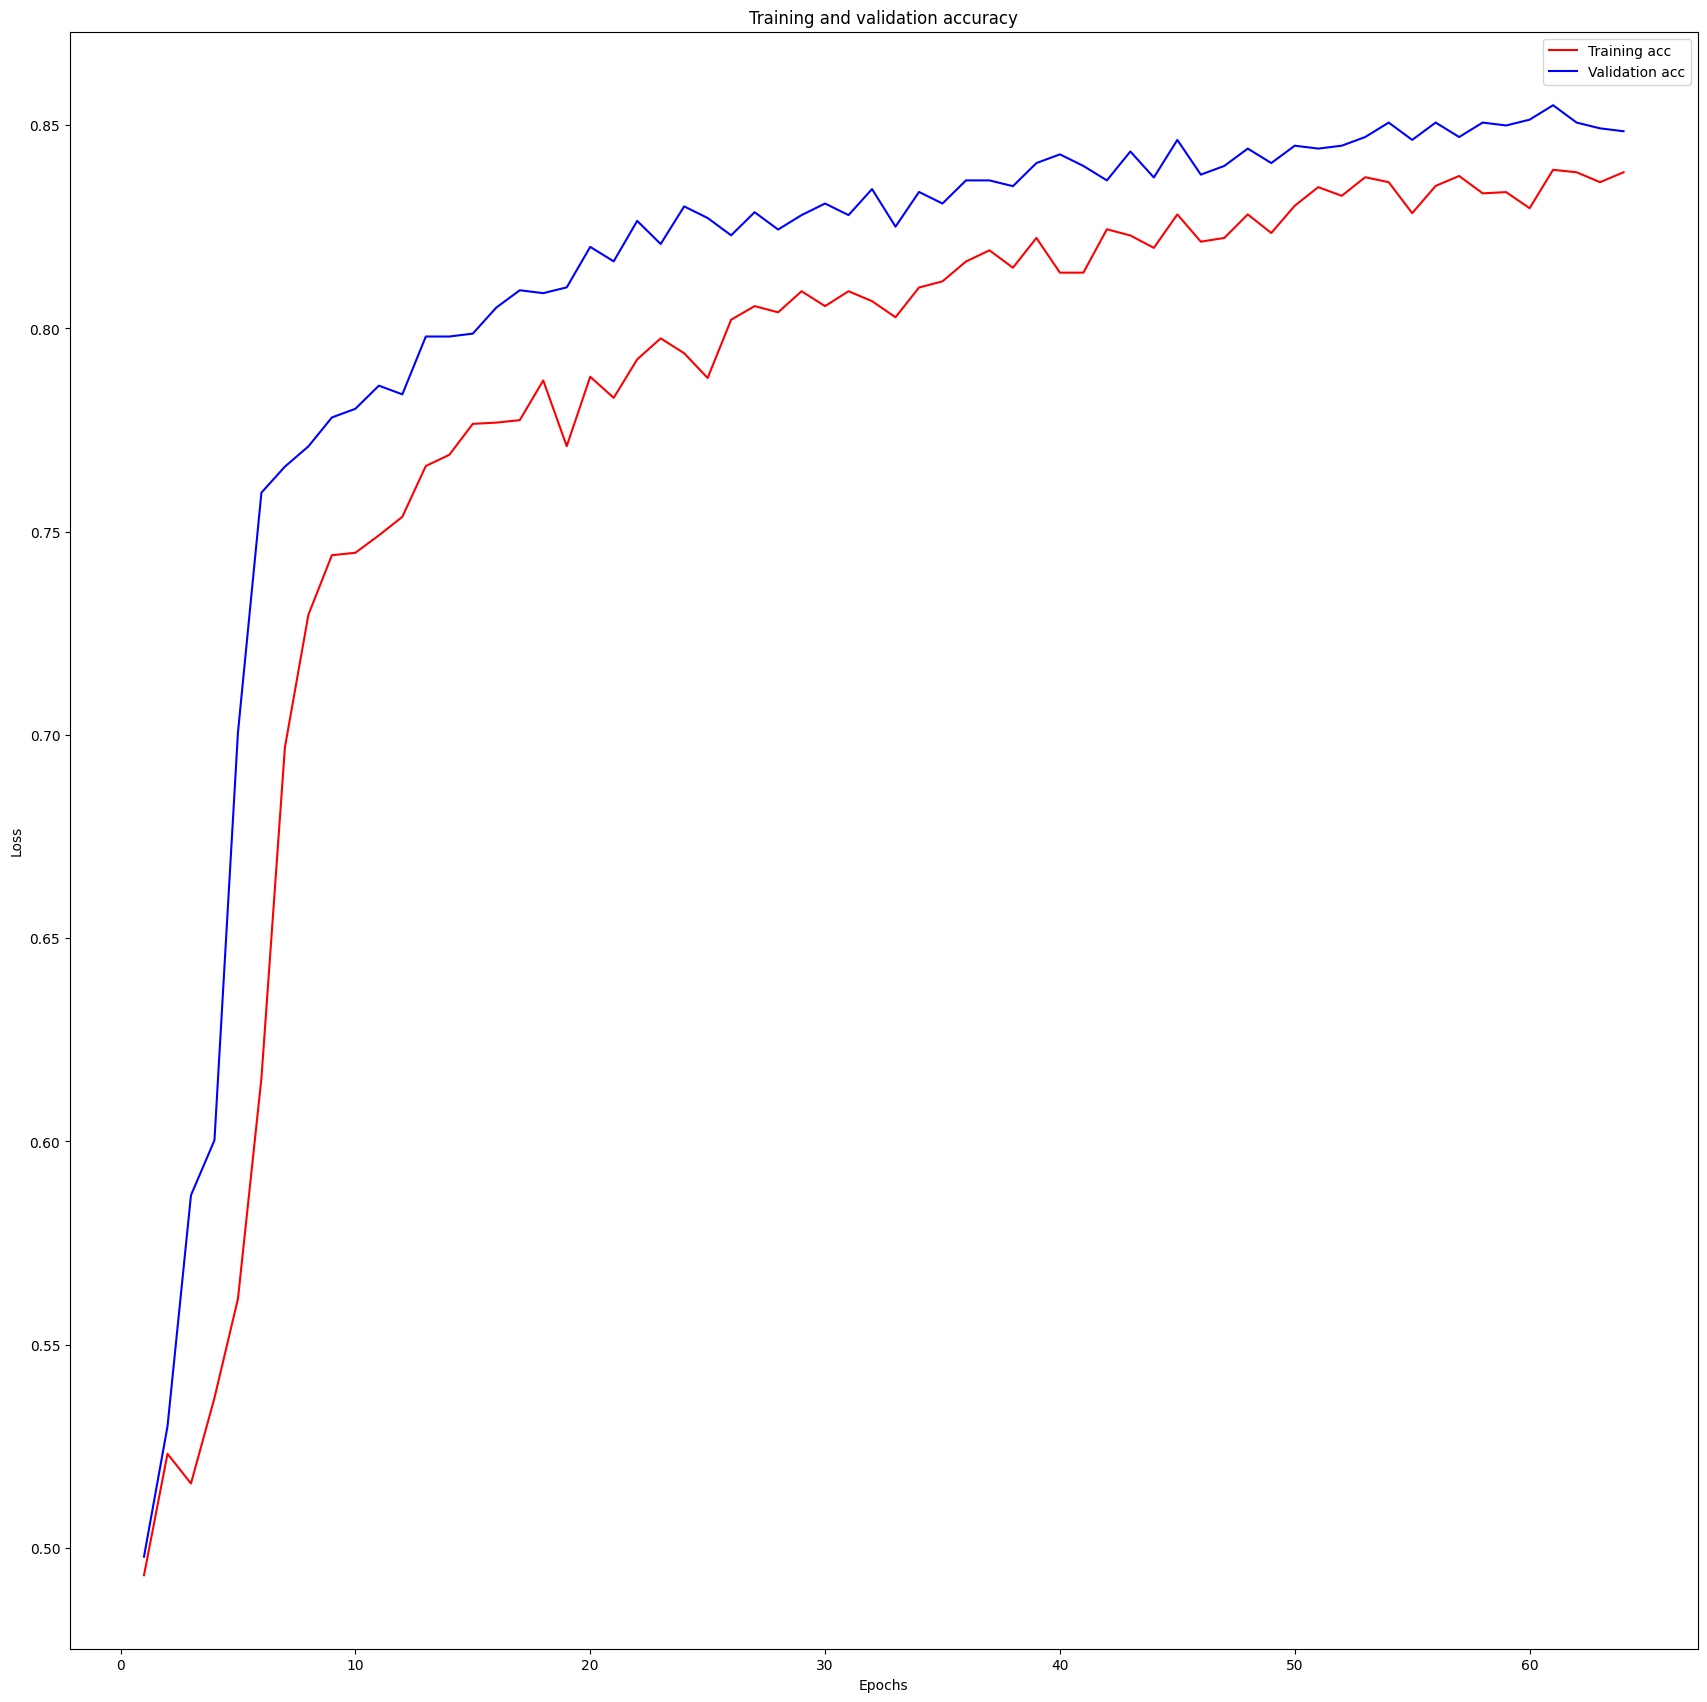

In [1336]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# De estas curvas se pueden obtener varias conclusiones respecto a la red.
# En principio, deben ser bastante parecidas tanto train como val, reflejando el aprendizaje de la RNA
# El desempeño sobre val suele ser menor, son datos no utilizados para el entrenamiento
# Si en val se obtienen cosas muy diferentes, al realizar predicciones sobre el set para test va a pasar algo muy parecido

# RNA Bypass

In [1337]:
from tensorflow import keras

inputs = keras.Input(shape=(x_train.shape[1],))
a = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.2)(a)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.concatenate([a, x])
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='sigmoid')(x)

nn = keras.Model(inputs, output, name="acv_predictor")
nn.summary()

Model: "acv_predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_69 (InputLayer)   │ (None, 10)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_695 (Dense)             │ (None, 64)                │             704 │ input_layer_69[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_626 (Dropout)         │ (None, 64)                │               0 │ dense_695[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_696 (Dense)             │ (None, 128)               │           8,320 │ dropout_626[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_627 (Dropout)         │ (None, 128)               │               0 │ dense_696[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_697 (Dense)             │ (None, 256)               │          33,024 │ dropout_627[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_628 (Dropout)         │ (None, 256)               │               0 │ dense_697[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_698 (Dense)             │ (None, 128)               │          32,896 │ dropout_628[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_629 (Dropout)         │ (None, 128)               │               0 │ dense_698[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_16 (Concatenate)  │ (None, 192)               │               0 │ dense_695[0][0],           │
│                               │                           │                 │ dropout_629[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_699 (Dense)             │ (None, 64)                │          12,352 │ concatenate_16[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_630 (Dropout)         │ (None, 64)                │               0 │ dense_699[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_700 (Dense)             │ (None, 32)                │           2,080 │ dropout_630[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_631 (Dropout)         │ (None, 32)                │               0 │ dense_700[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_701 (Dense)             │ (None, 1)                 │              33 │ dropout_631[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 89,409 (349.25 KB)

 Trainable params: 89,409 (349.25 KB)

 Non-trainable params: 0 (0.00 B)

In [1338]:
from tensorflow.keras.utils import plot_model

# Herramienta para graficar la topología. Abajo hay una gráfica simplificada...
plot_model(nn, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [1339]:
nn.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Criterio extra de parada, si no cambia la pérdida en los datos de validación por 30 épocas
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
start = time.time()
history = nn.fit(x_train, y_train, epochs=200, callbacks=[early_stopper], validation_data=(x_val, y_val), verbose=0)
end_train = time.time()

In [1340]:
y_pred = nn.predict(x_test)
end_predict = time.time()
y_pred = [1.0 if p > 0.5 else 0 for p in y_pred]
print(classification_report(y_test, y_pred))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      1004
         1.0       0.12      0.28      0.17        60

    accuracy                           0.84      1064
   macro avg       0.54      0.58      0.54      1064
weighted avg       0.91      0.84      0.87      1064



In [1341]:
muestra_metricas("RNA Bypass", y_test, y_pred, start, end_train, end_predict)

#######################################
Accuracy: 84.30%
Recall: 84.30%
Precision: 90.64%
F1-Score: 87.14%
MCC: 10.87%
Tiempo de entrenamiento: 55.9008 s
Tiempo de predicción: 0.2314 s
Tiempo total: 56.1322 s
#######################################


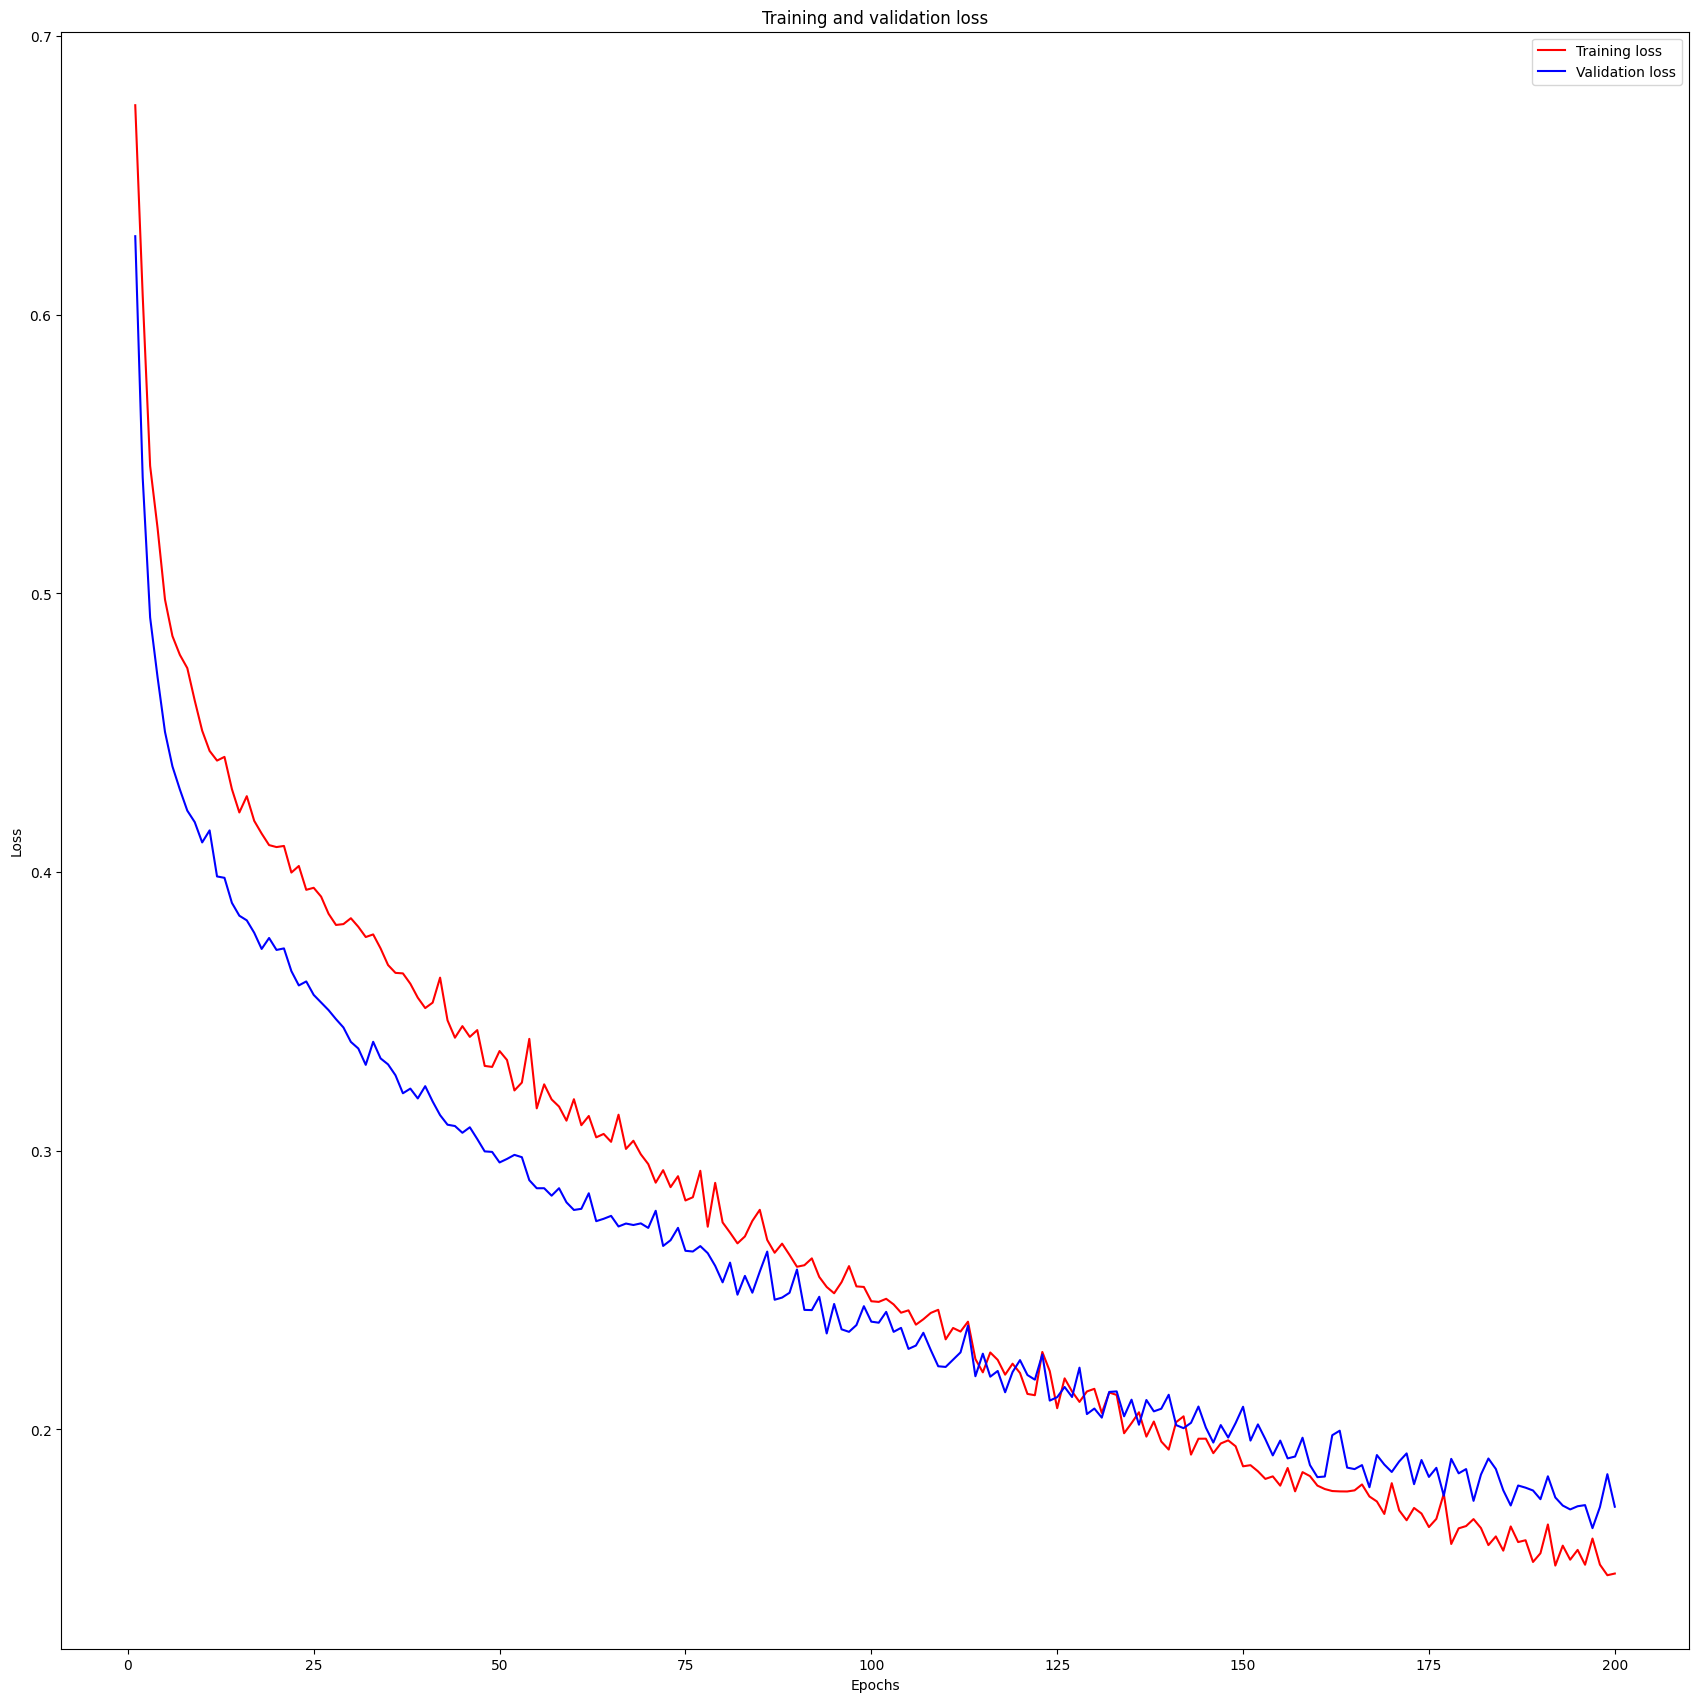

In [1342]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ver diferencias entre las curvas de entrenamiento y validación

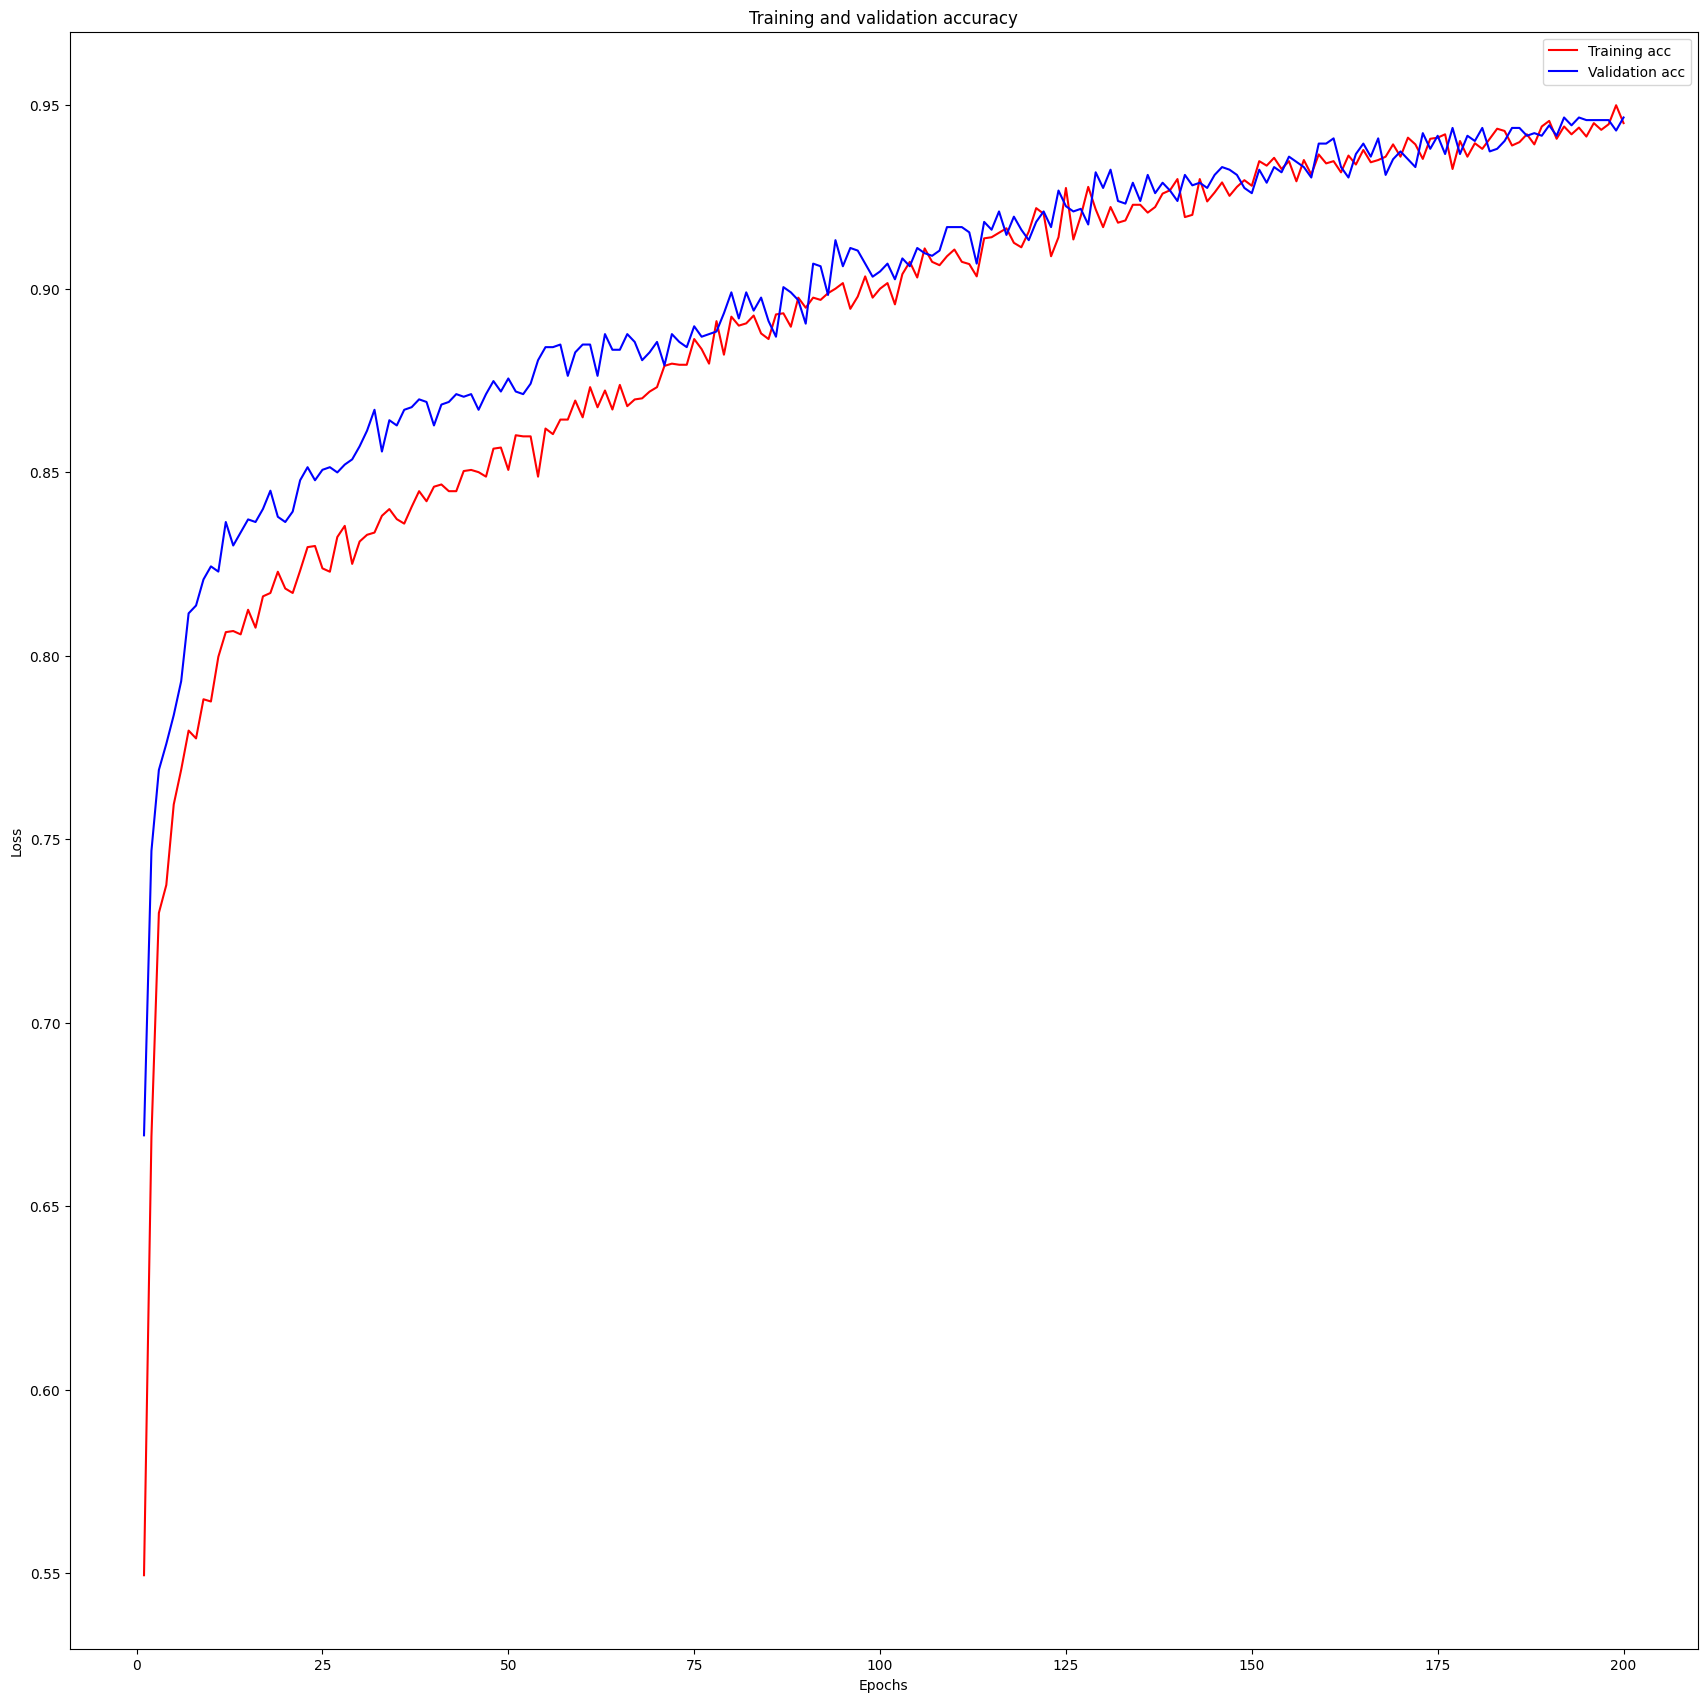

In [1343]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'r', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1344]:
confusion_matrix(y_test, y_pred)

array([[880, 124],
       [ 43,  17]], dtype=int64)

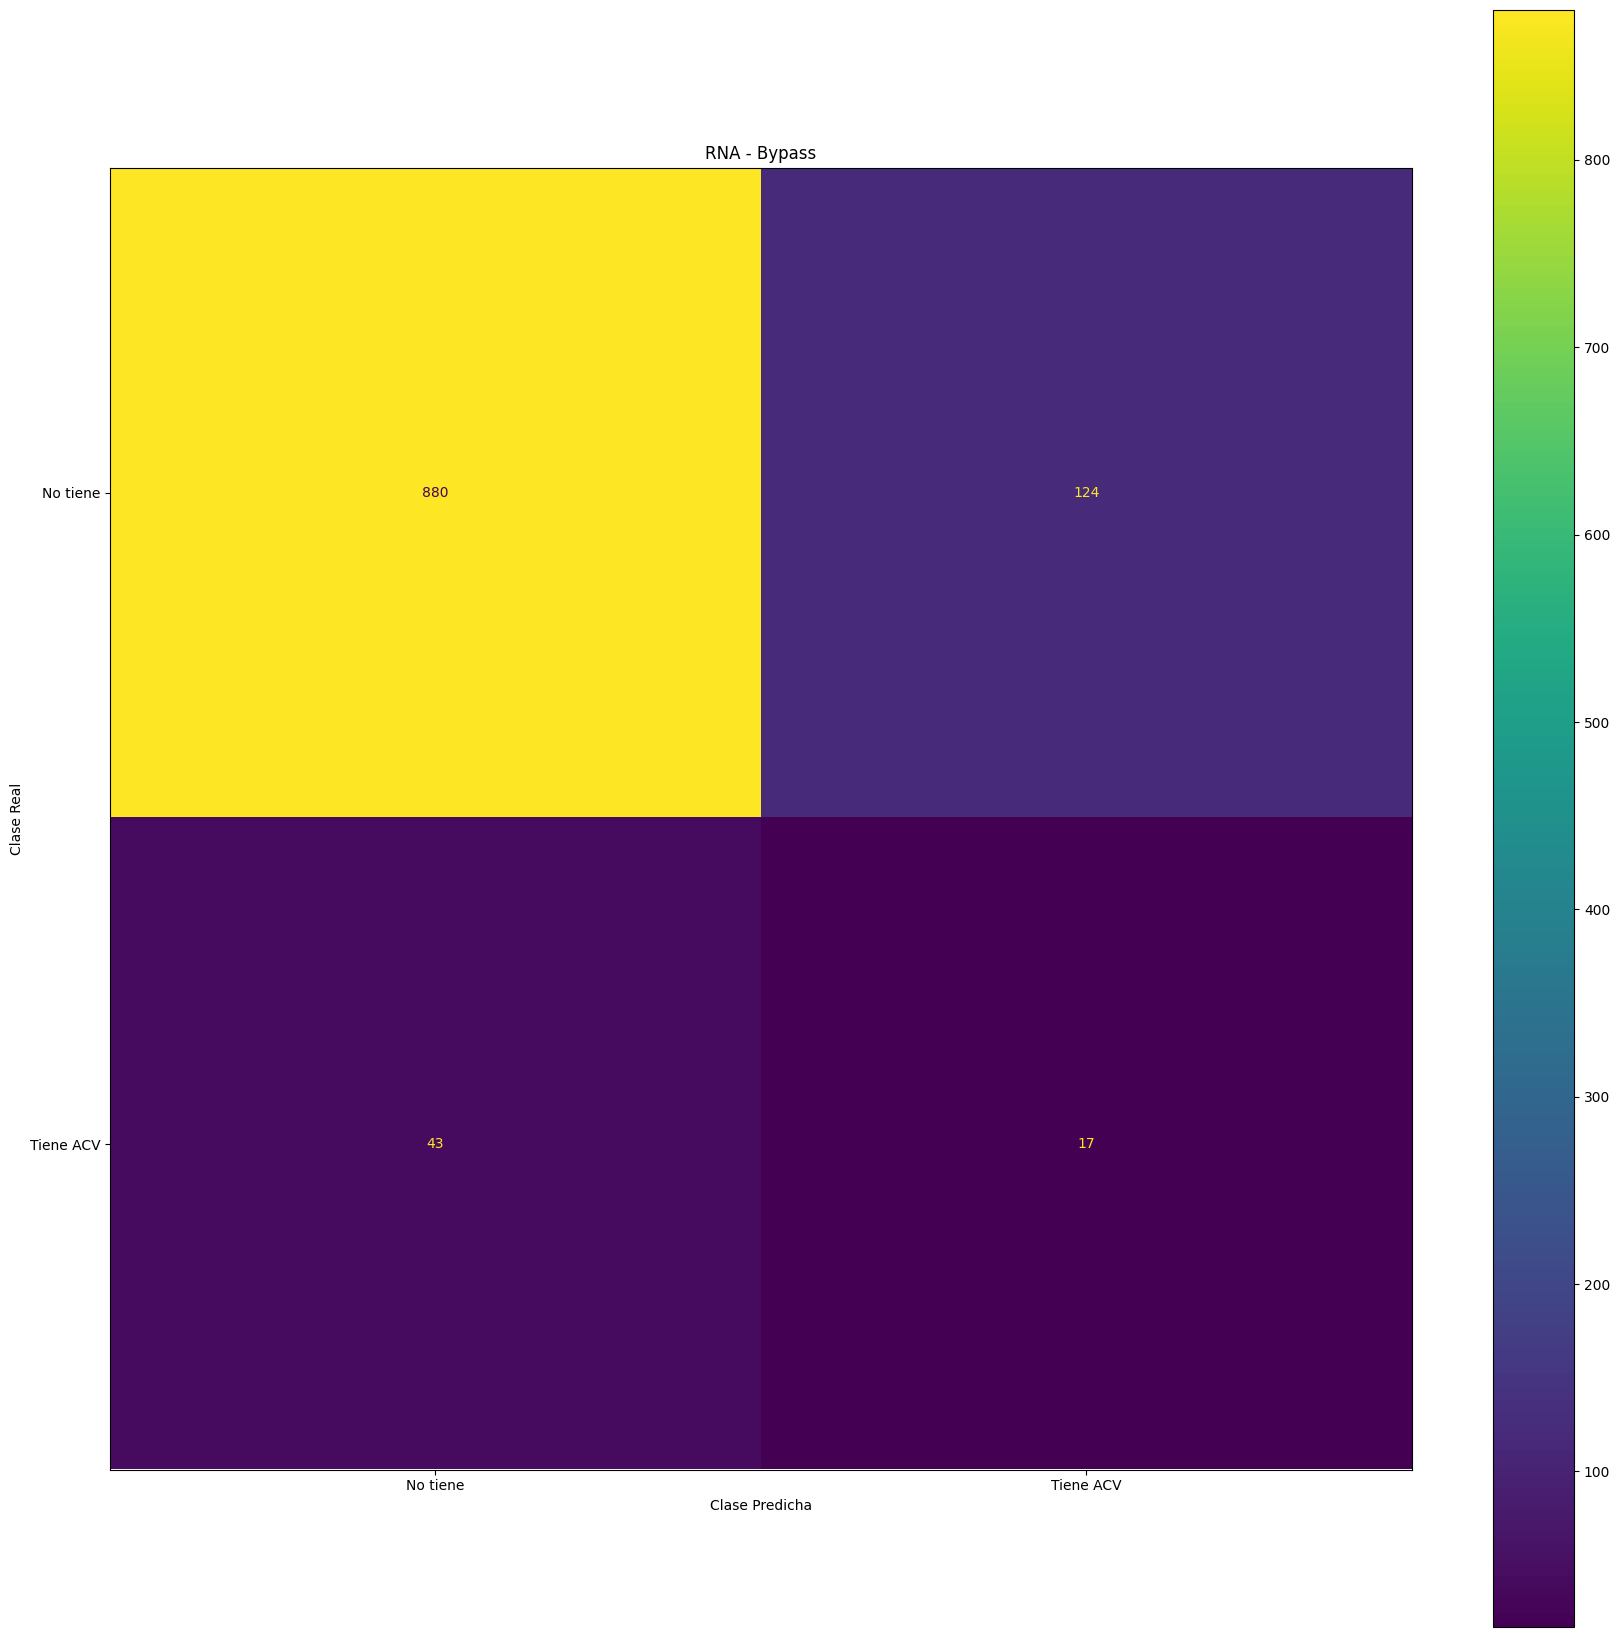

In [1345]:
plot_confusion_matrix(y_test, y_pred, labels=["No tiene","Tiene ACV"], model_name="RNA - Bypass")

# Árbol de Decisión

In [1346]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
start = time.time() # Estampa de tiempo para computar métricas
# Hay muchos parámetros para esto, lo interesante es que en pocas líneas se puede tener una primera impresión
tree_clf = DecisionTreeClassifier(random_state=1)

# Entrenamiento. Si ejecutaron todo el notebook, los últimos set de train son los aumentados para equiparar las clases.
tree_clf.fit(x_train, y_train)
end_train = time.time()

pred = tree_clf.predict(x_test)
end_predict = time.time()
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))
muestra_metricas("DecisionTreeClassifier", y_test, pred, start, end_train, end_predict)

Accuracy Score:  0.8674812030075187
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      1004
         1.0       0.11      0.18      0.13        60

    accuracy                           0.87      1064
   macro avg       0.53      0.55      0.53      1064
weighted avg       0.90      0.87      0.88      1064

#######################################
Accuracy: 86.75%
Recall: 86.75%
Precision: 90.15%
F1-Score: 88.35%
MCC: 7.15%
Tiempo de entrenamiento: 0.0444 s
Tiempo de predicción: 0.0010 s
Tiempo total: 0.0454 s
#######################################


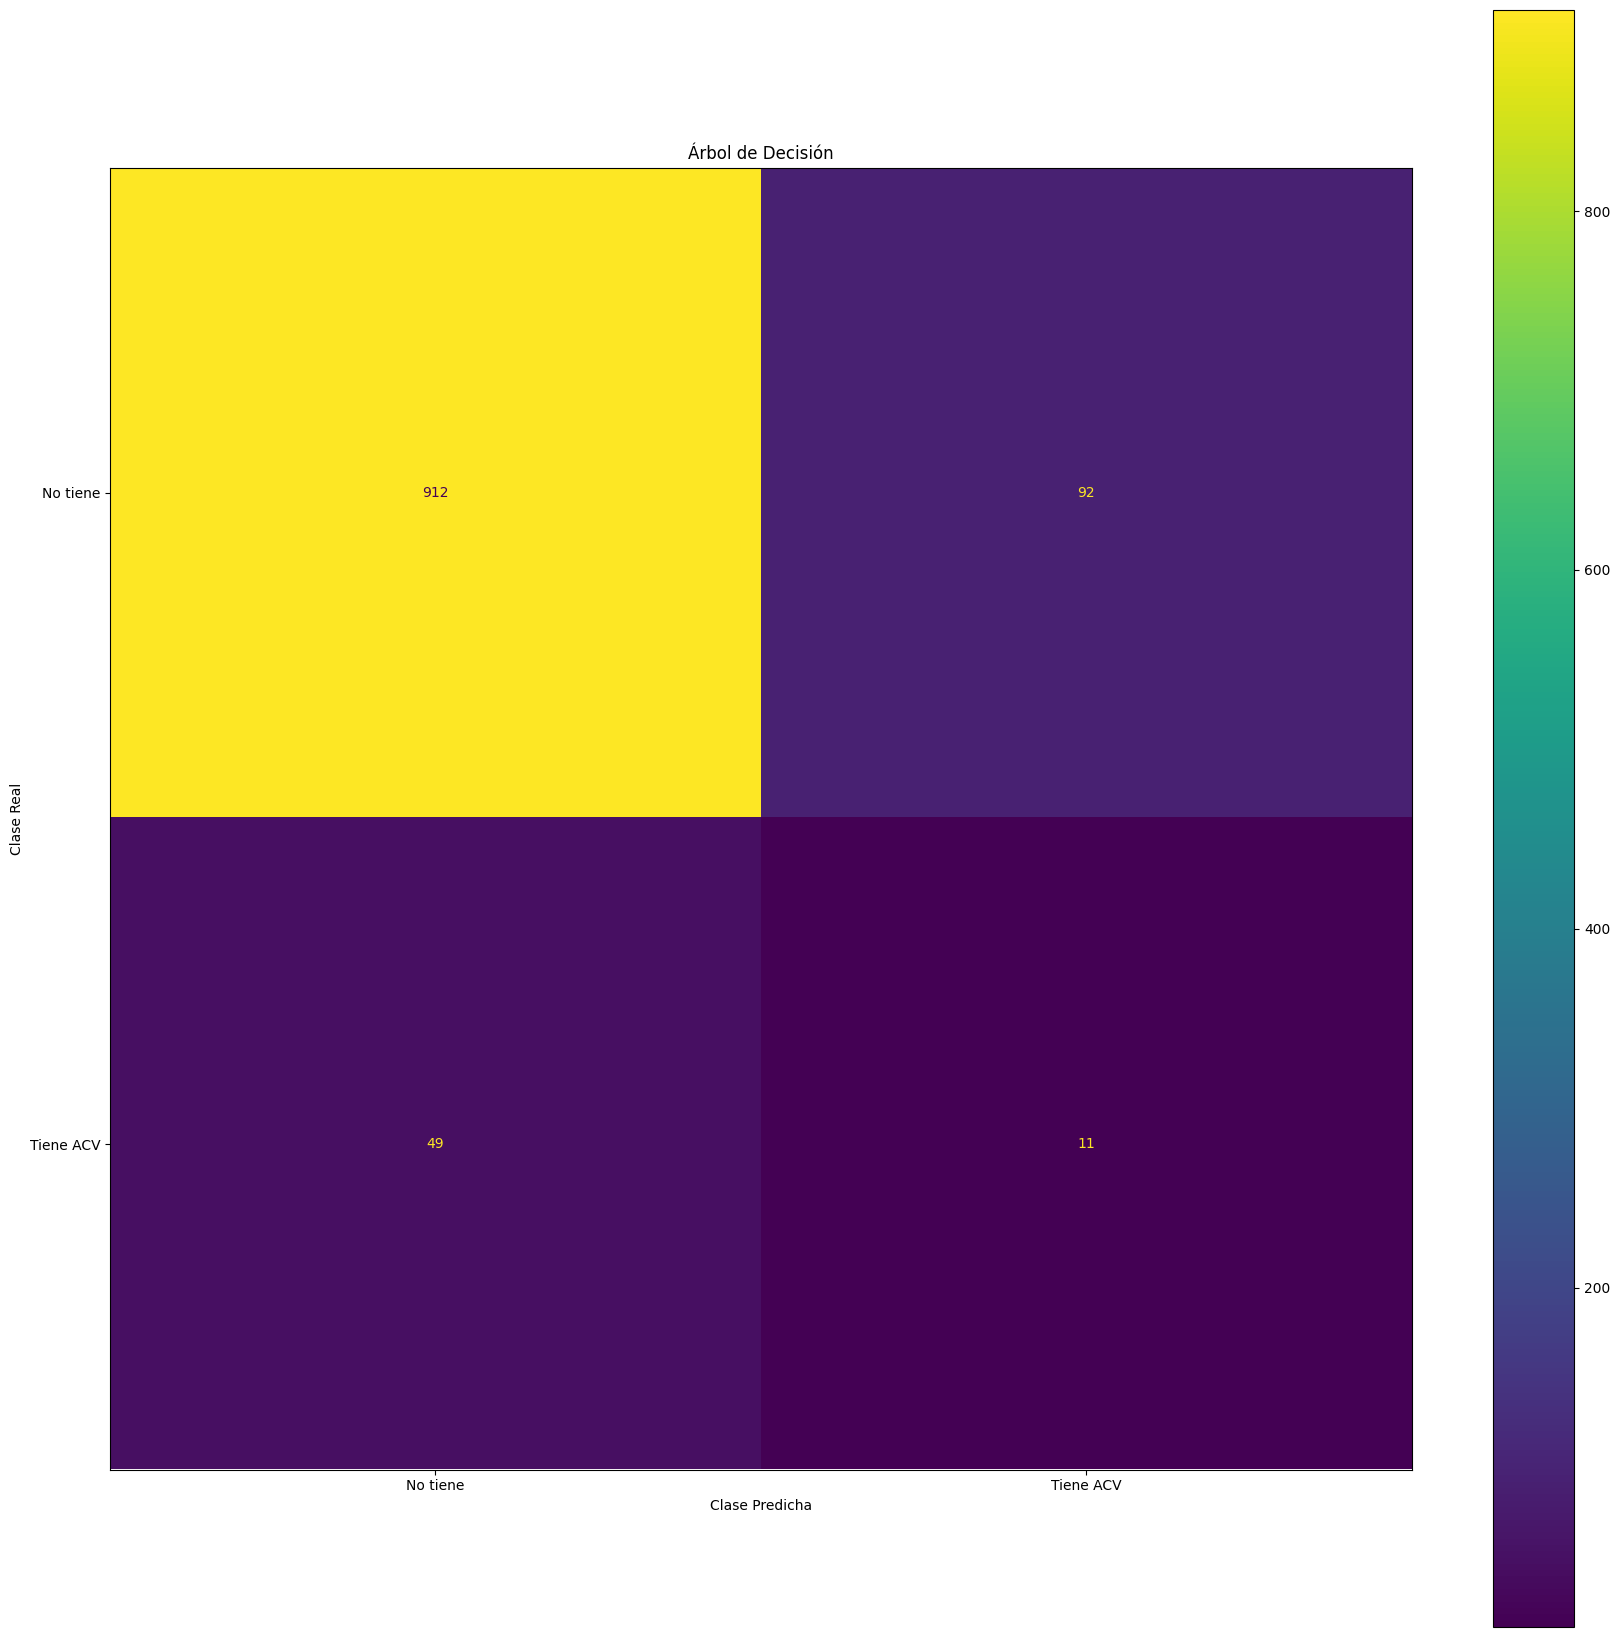

In [1347]:
plot_confusion_matrix(y_test, pred, labels=["No tiene","Tiene ACV"], model_name="Árbol de Decisión")

# Red Neuronal

In [1348]:
from sklearn.neural_network import MLPClassifier
start = time.time() # Estampa de tiempo para computar métricas
nn_clf = MLPClassifier()
nn_clf.fit(x_train, y_train)
end_train = time.time()

pred = nn_clf.predict(x_test)
end_predict = time.time()

print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))

muestra_metricas("Red Neuronal", y_test, pred, start, end_train, end_predict)

Accuracy Score:  0.831766917293233
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.91      1004
         1.0       0.12      0.32      0.18        60

    accuracy                           0.83      1064
   macro avg       0.54      0.59      0.54      1064
weighted avg       0.91      0.83      0.87      1064

#######################################
Accuracy: 83.18%
Recall: 83.18%
Precision: 90.78%
F1-Score: 86.51%
MCC: 11.66%
Tiempo de entrenamiento: 2.6794 s
Tiempo de predicción: 0.0000 s
Tiempo total: 2.6794 s
#######################################


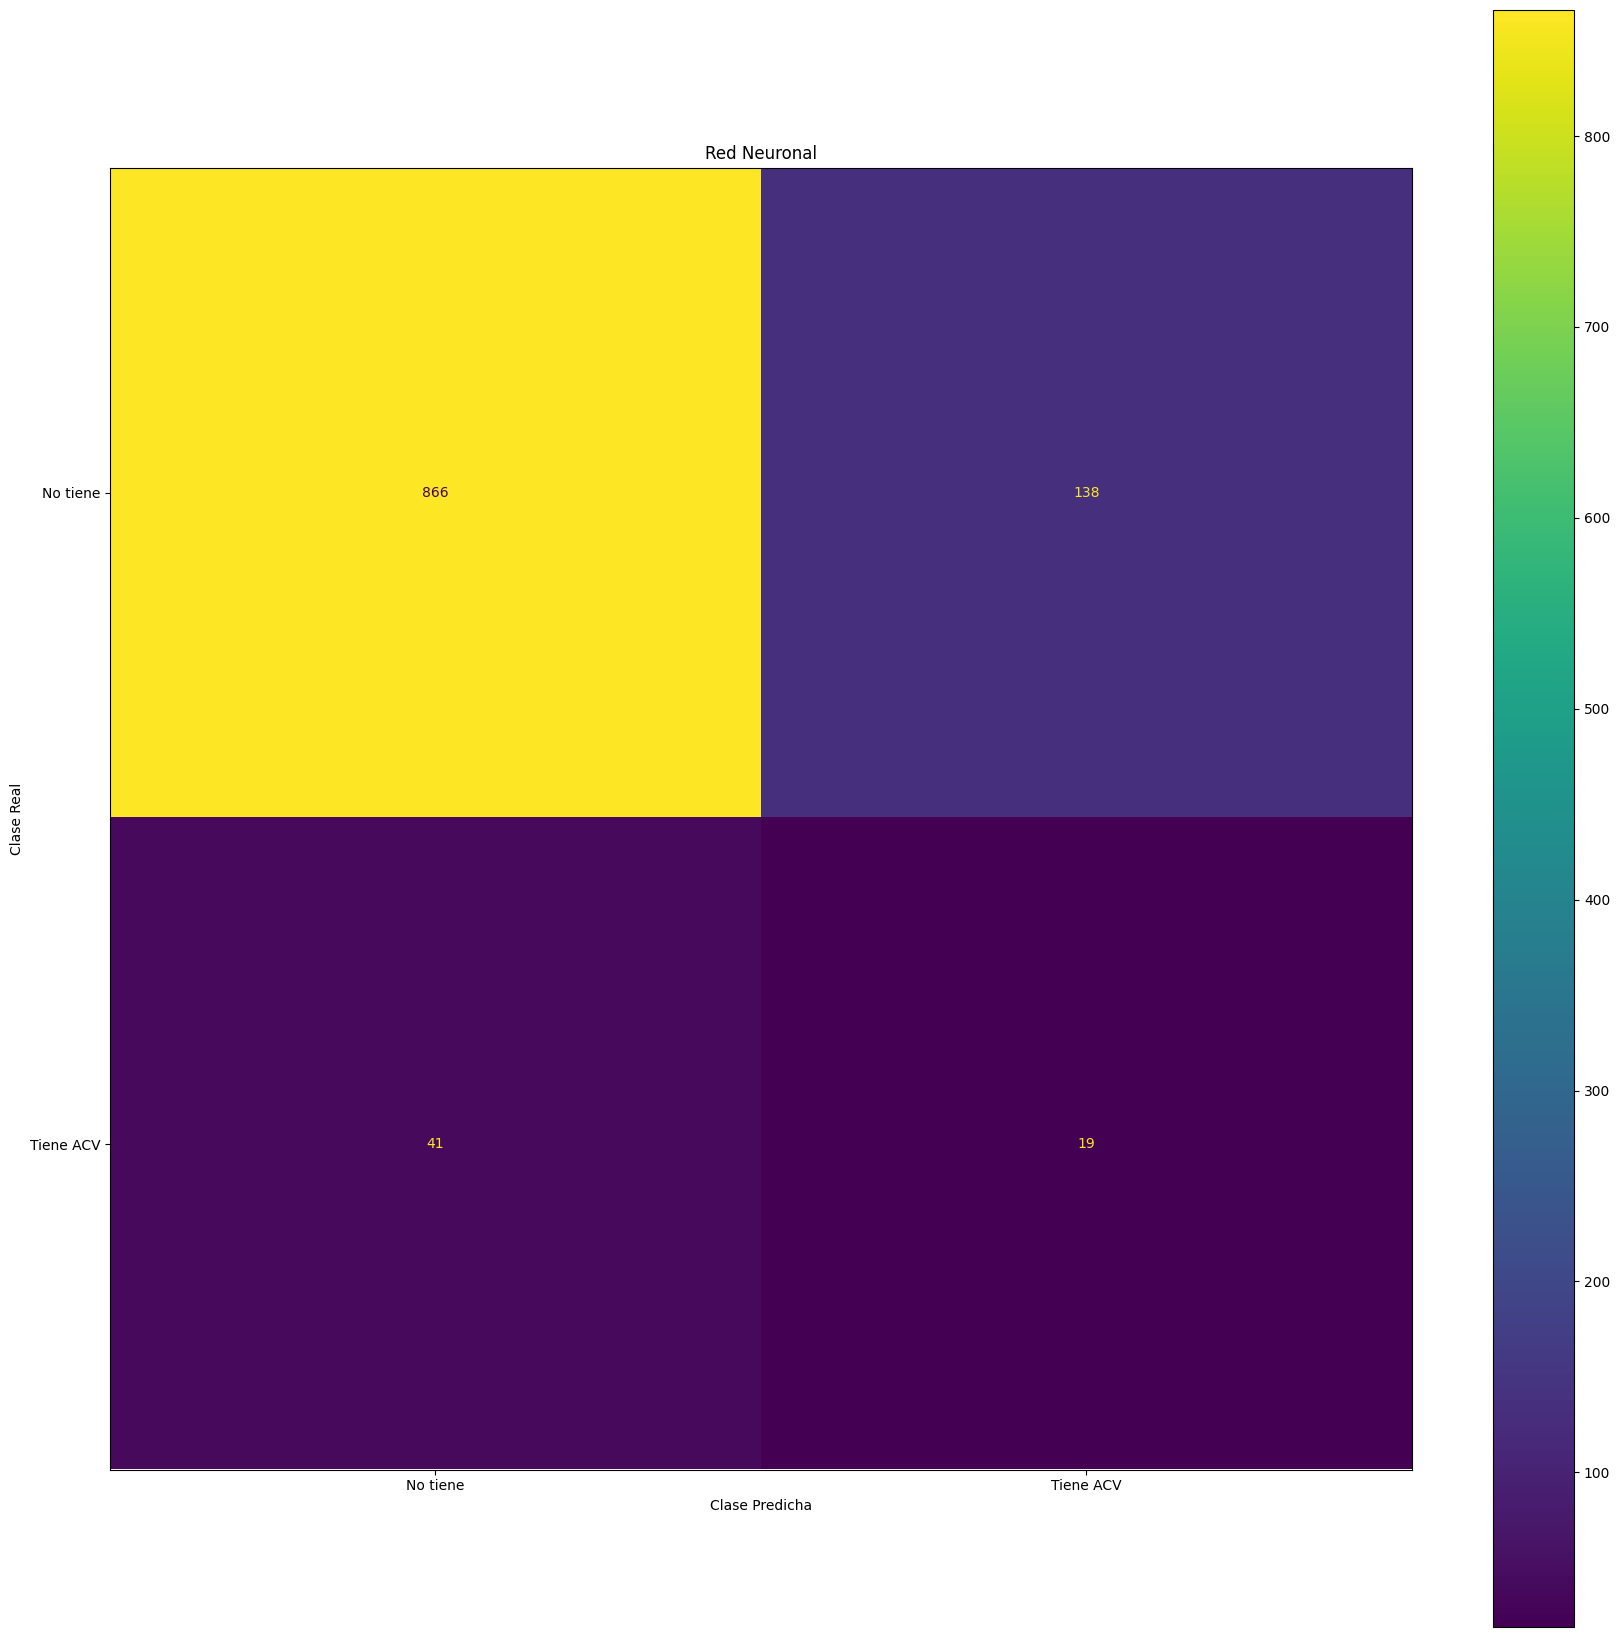

In [1349]:
plot_confusion_matrix(y_test, pred, labels=["No tiene","Tiene ACV"], model_name="Red Neuronal")

# KNN

In [1350]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time() # Estampa de tiempo para computar métricas
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
end_train = time.time()
pred = knn_clf.predict(x_test)
end_predict = time.time()
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))
muestra_metricas("KNeighborsClassifier", y_test, pred, start, end_train, end_predict)

Accuracy Score:  0.7810150375939849
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.81      0.87      1004
         1.0       0.09      0.32      0.14        60

    accuracy                           0.78      1064
   macro avg       0.52      0.56      0.51      1064
weighted avg       0.90      0.78      0.83      1064

#######################################
Accuracy: 78.10%
Recall: 78.10%
Precision: 90.33%
F1-Score: 83.31%
MCC: 7.26%
Tiempo de entrenamiento: 0.0040 s
Tiempo de predicción: 0.0642 s
Tiempo total: 0.0682 s
#######################################


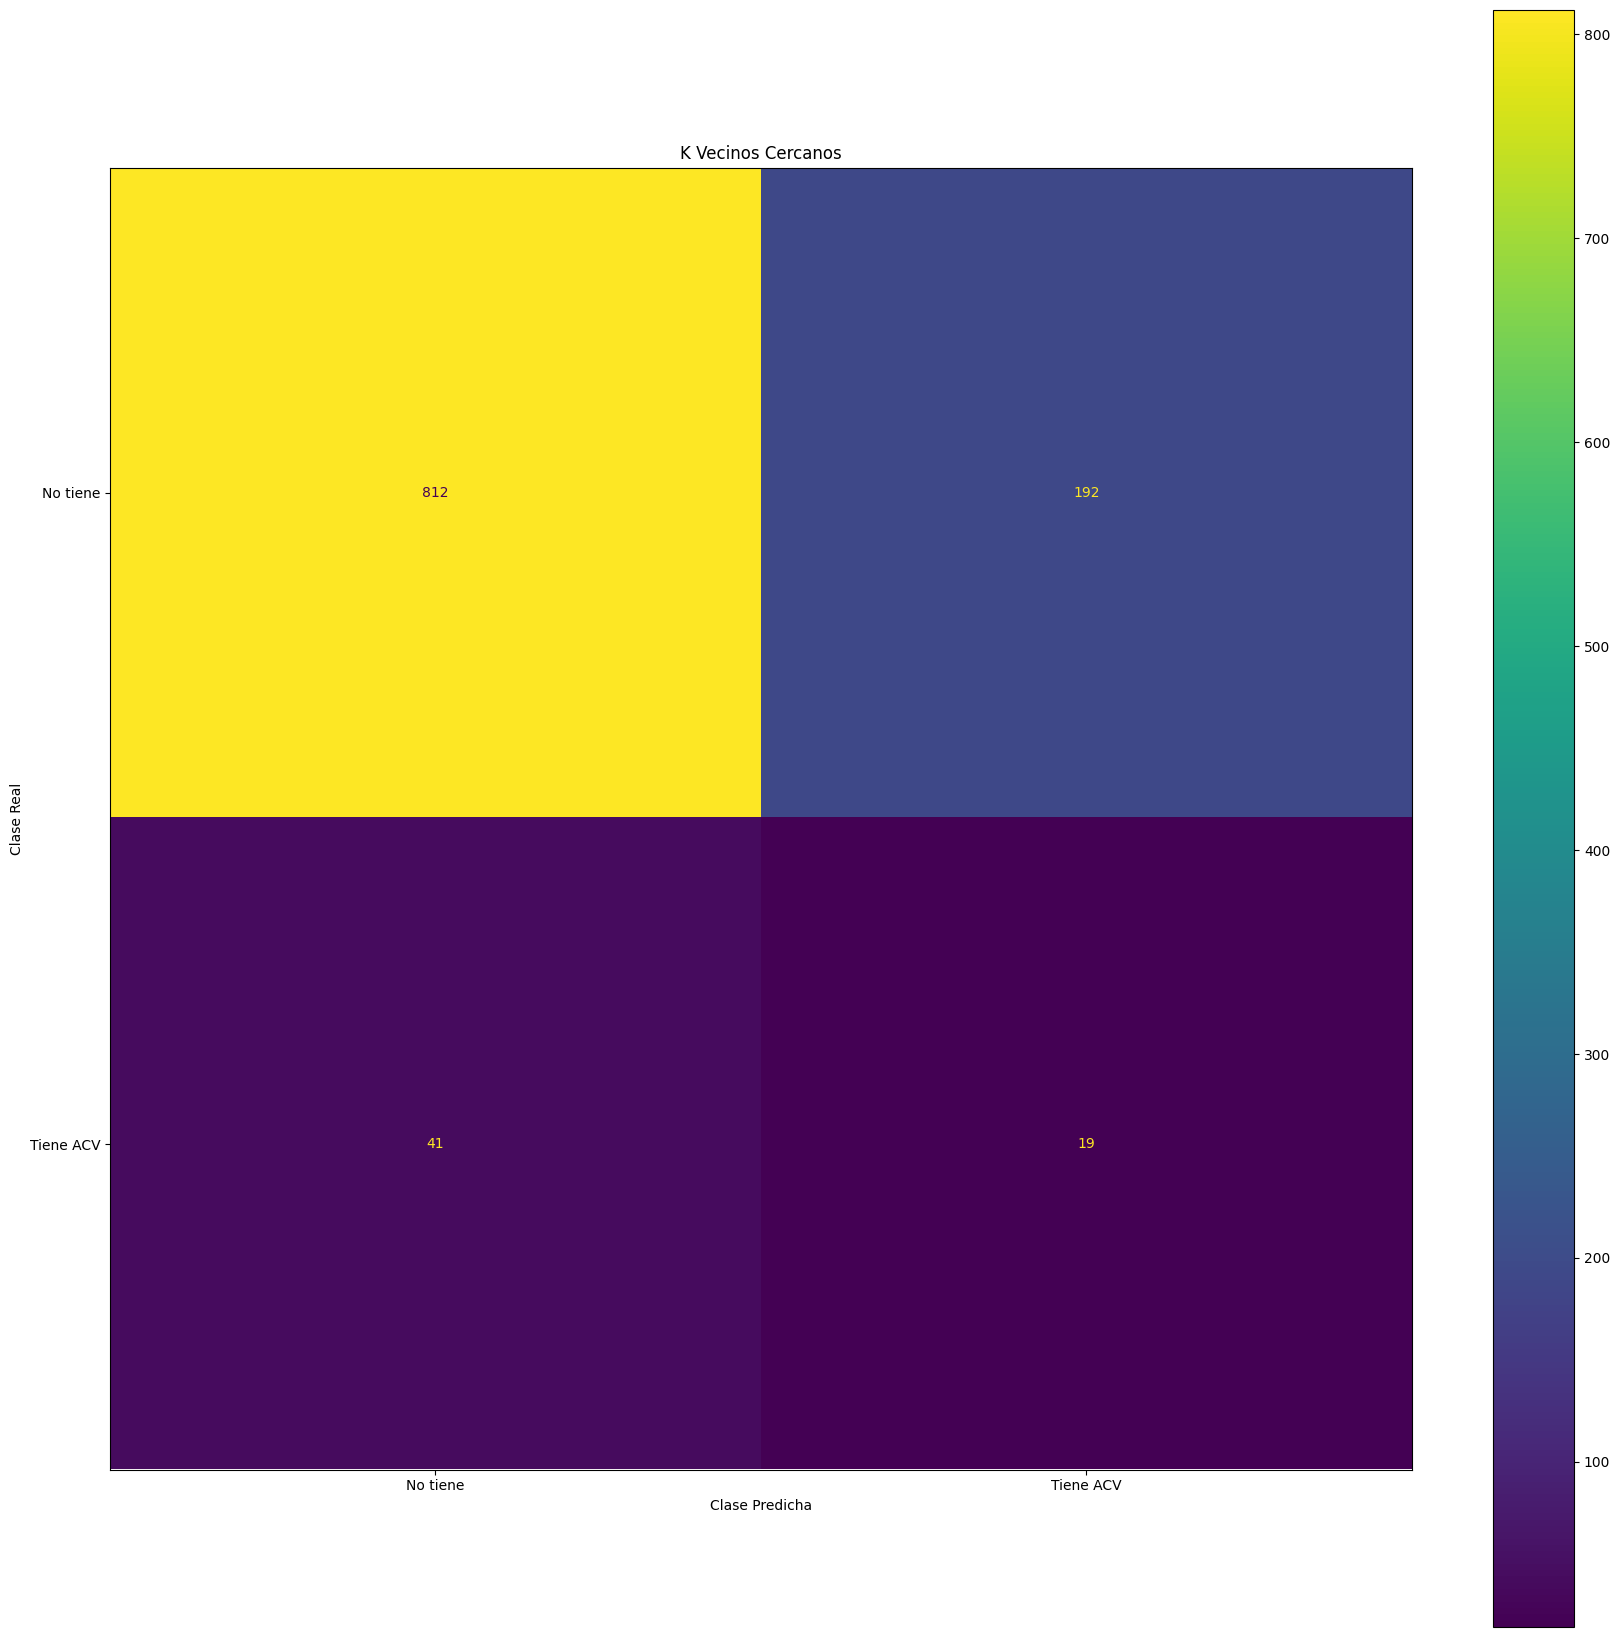

In [1351]:
plot_confusion_matrix(y_test, pred, labels=["No tiene","Tiene ACV"], model_name="K Vecinos Cercanos")

# Regresion Logistica

In [1352]:
from sklearn.linear_model import LogisticRegression
start = time.time() # Estampa de tiempo para computar métricas
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
end_train = time.time()

pred = lr_clf.predict(x_test)
end_predict = time.time()
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))
muestra_metricas("LogisticRegression", y_test, pred, start, end_train, end_predict)

Accuracy Score:  0.7020676691729323
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.69      0.81      1004
         1.0       0.14      0.83      0.24        60

    accuracy                           0.70      1064
   macro avg       0.56      0.76      0.53      1064
weighted avg       0.94      0.70      0.78      1064

#######################################
Accuracy: 70.21%
Recall: 70.21%
Precision: 93.82%
F1-Score: 78.23%
MCC: 25.77%
Tiempo de entrenamiento: 0.0037 s
Tiempo de predicción: 0.0000 s
Tiempo total: 0.0037 s
#######################################


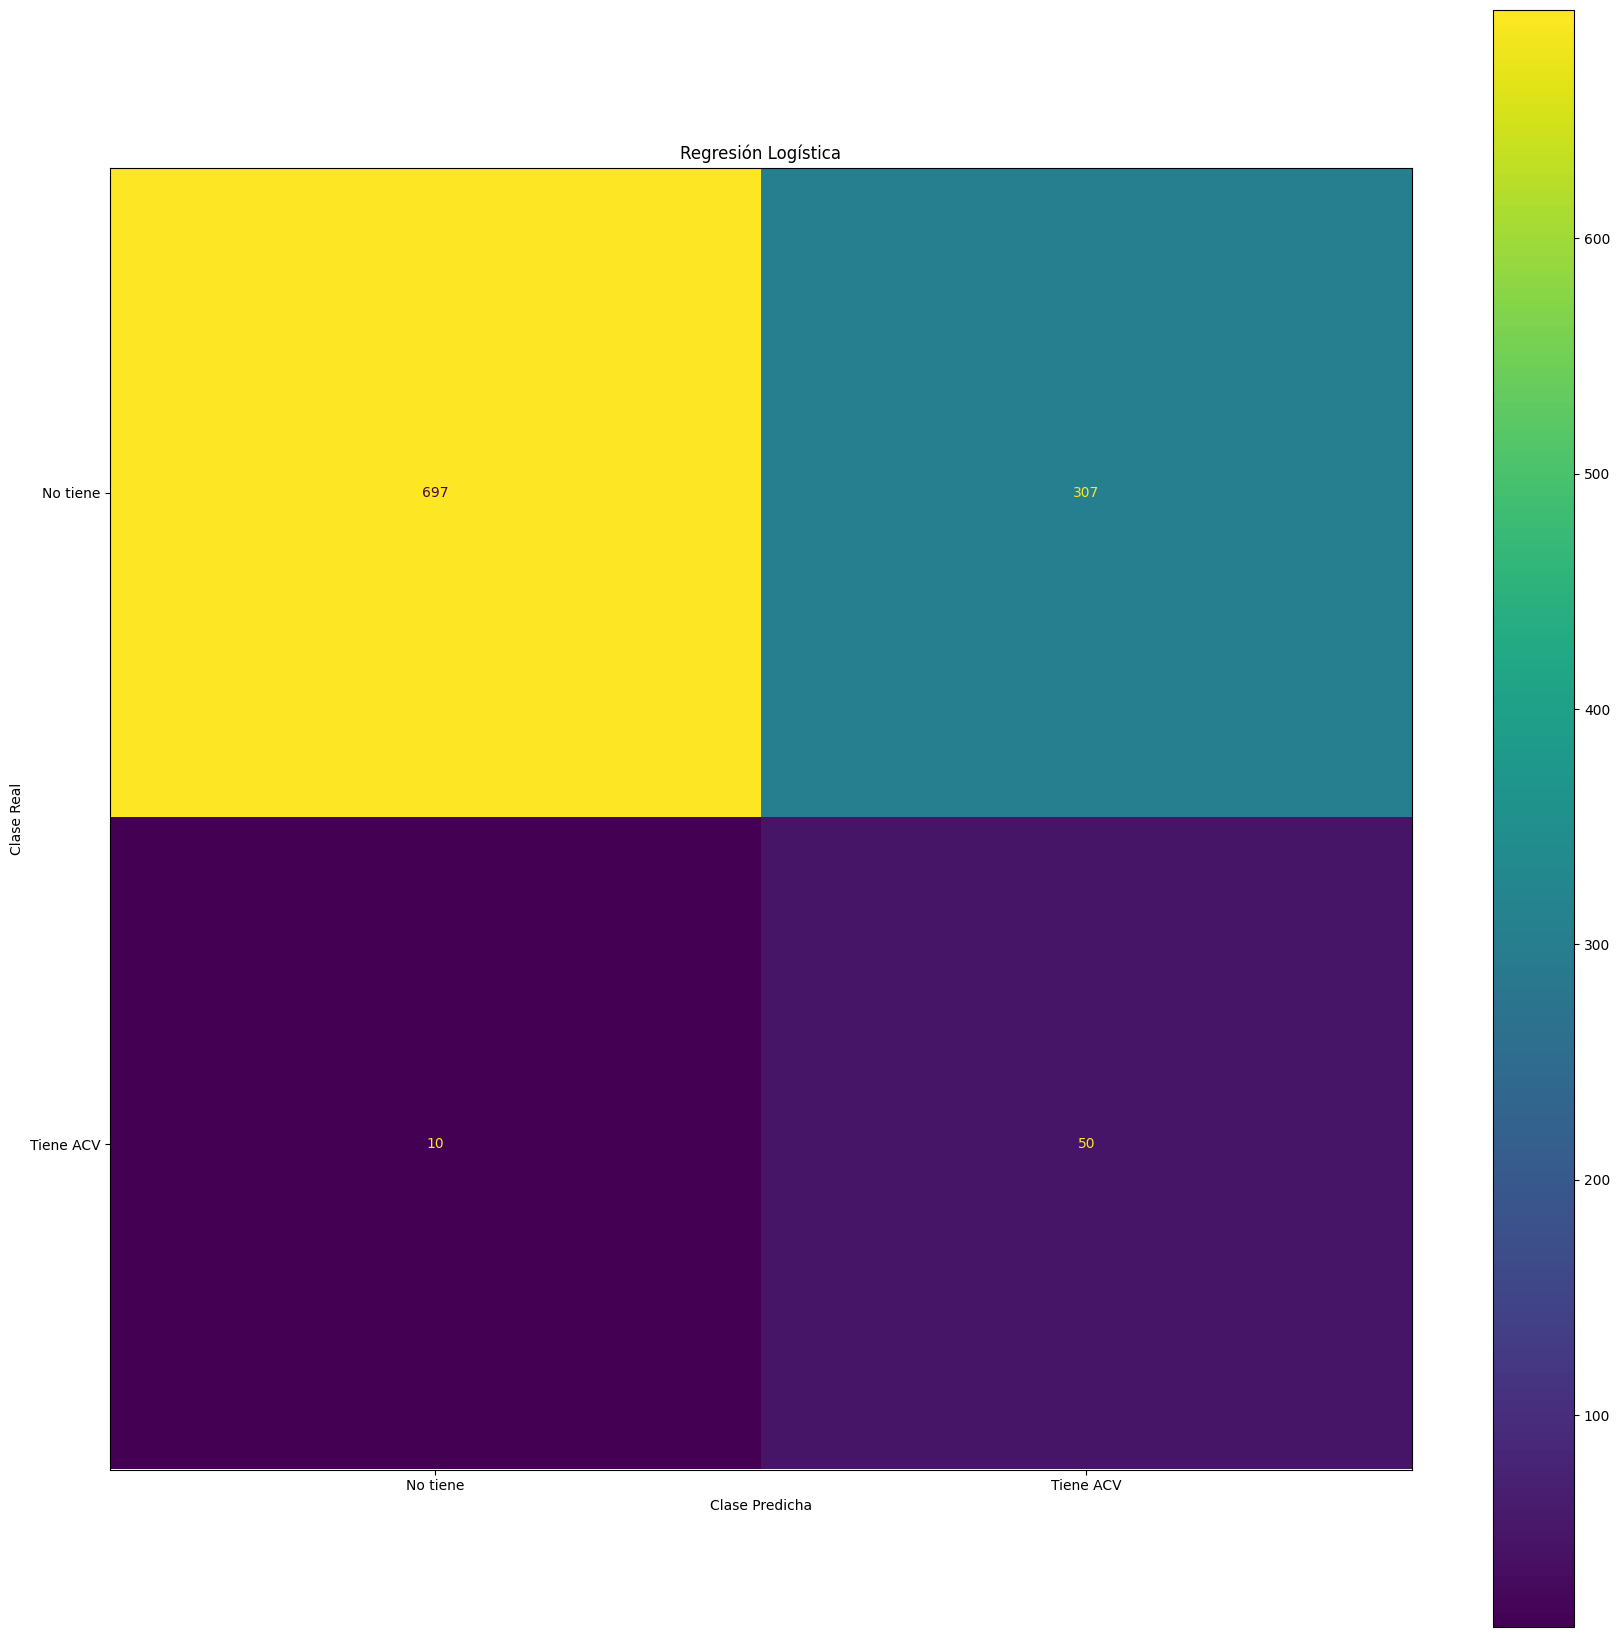

In [1353]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred, labels=["No tiene","Tiene ACV"], model_name="Regresión Logística")

# XGB

In [1354]:
from xgboost import XGBClassifier

start = time.time() # Estampa de tiempo para computar métricas
xgbc_clf = XGBClassifier()
xgbc_clf.fit(x_train, y_train)
end_train = time.time()

pred = xgbc_clf.predict(x_test)
end_predict = time.time()
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test, pred))
muestra_metricas("XGB", y_test, pred, start, end_train, end_predict)

Accuracy Score:  0.9060150375939849
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1004
         1.0       0.13      0.12      0.12        60

    accuracy                           0.91      1064
   macro avg       0.54      0.53      0.54      1064
weighted avg       0.90      0.91      0.90      1064

#######################################
Accuracy: 90.60%
Recall: 90.60%
Precision: 90.14%
F1-Score: 90.37%
MCC: 7.34%
Tiempo de entrenamiento: 0.0714 s
Tiempo de predicción: 0.0010 s
Tiempo total: 0.0724 s
#######################################


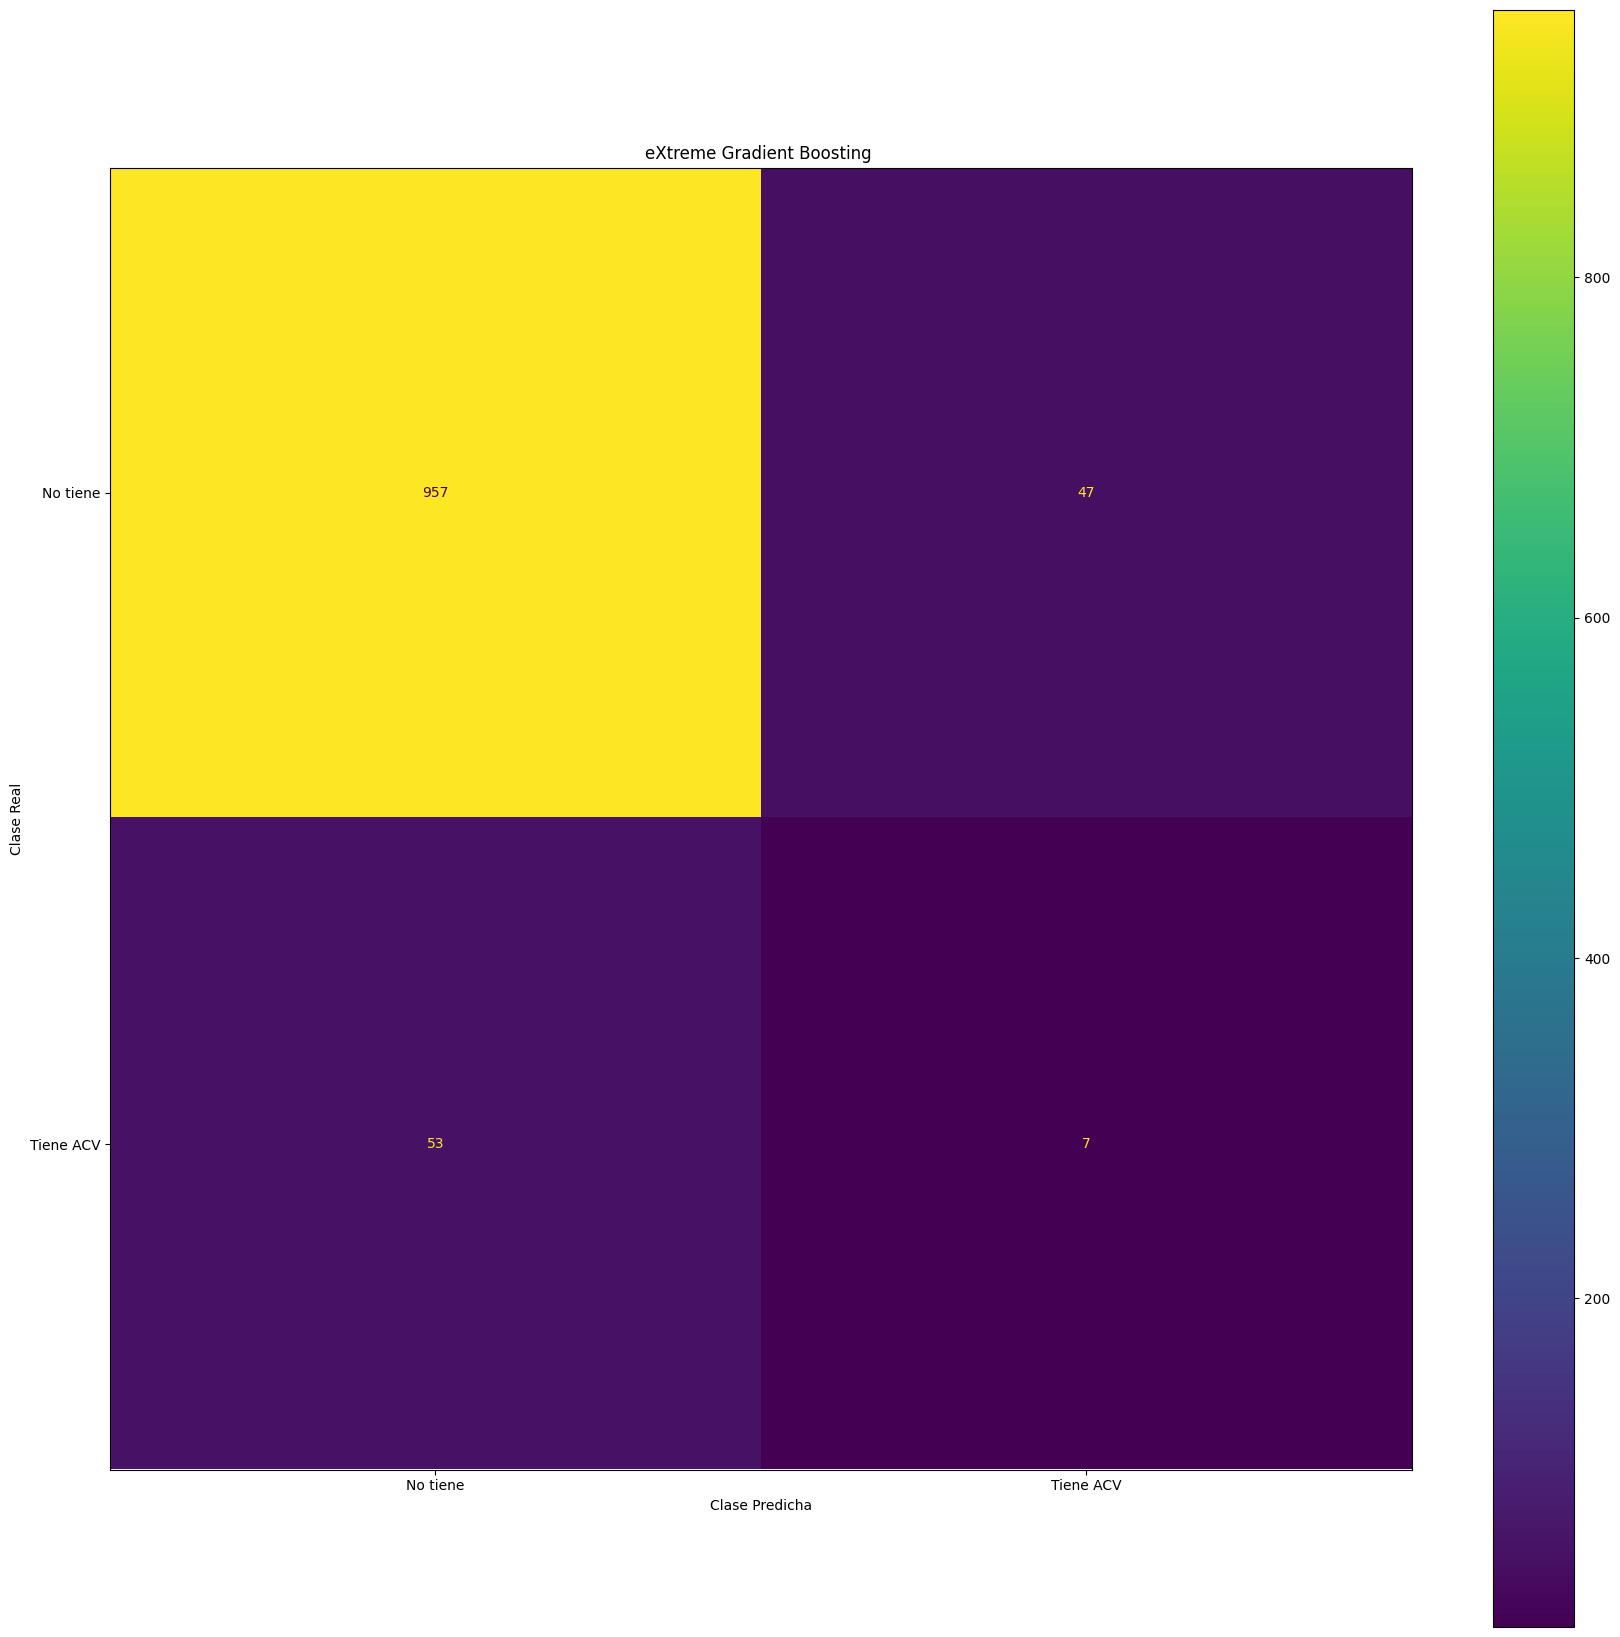

In [1355]:
plot_confusion_matrix(y_test, pred, labels=["No tiene","Tiene ACV"], model_name="eXtreme Gradient Boosting ")

# Comparacion de Modelos

In [1356]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train,Time to Predict,Total Time
RNA - Topologia Manual,94.36%,94.36%,89.04%,91.62%,0.00%,5.660,0.574,6.233
Re Entrenamiento,69.17%,69.17%,92.51%,77.47%,18.44%,7.089,0.565,7.654
RNA Bypass,84.30%,84.30%,90.64%,87.14%,10.87%,55.901,0.231,56.132
DecisionTreeClassifier,86.75%,86.75%,90.15%,88.35%,7.15%,0.044,0.001,0.045
Red Neuronal,83.18%,83.18%,90.78%,86.51%,11.66%,2.679,0.000,2.679
KNeighborsClassifier,78.10%,78.10%,90.33%,83.31%,7.26%,0.004,0.064,0.068
LogisticRegression,70.21%,70.21%,93.82%,78.23%,25.77%,0.004,0.000,0.004
XGB,90.60%,90.60%,90.14%,90.37%,7.34%,0.071,0.001,0.072
